# Pygor Tutorial

Welcome to the pygor3 Tutorial.

Pygor3 is an open source project and Python package that allows to analyze infer, evaluate and generate V(D)J sequences, by using IGoR's.

Pygor3 could help you to get simple calculations and visualizations of the statistics in VDJ recombination

## Introduction

![alt text](IGoR_diagram.png "Title")

An IGoR model's encapsulates the Bayesian network probabilistic parameters of a V(D)J recombination process. 
IGoR is shipped with a set of default models.

As an example lets load the recombination model for a human $\beta$ T-cell receptor

## Loading default IgorModel

In [1]:
import pygor3 as p3
mdl_hb = p3.get_default_IgorModel("human", "tcr_beta")

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


In [2]:
mdl_hb

### Conditional probabilites

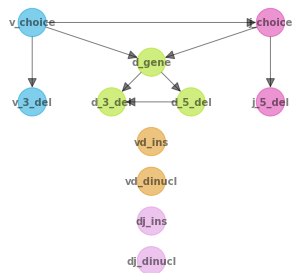

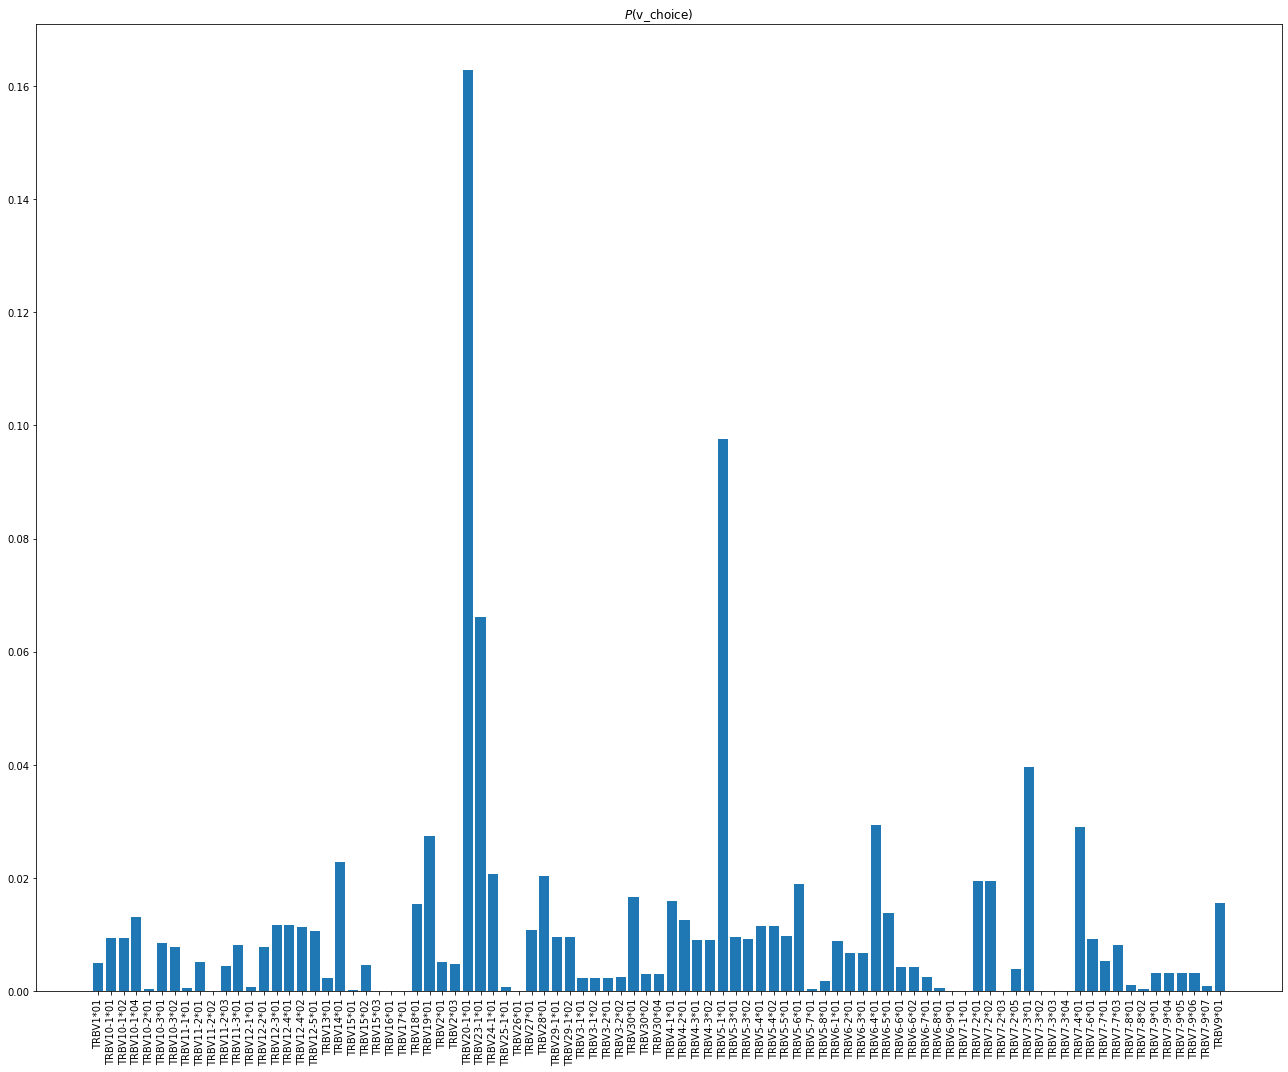

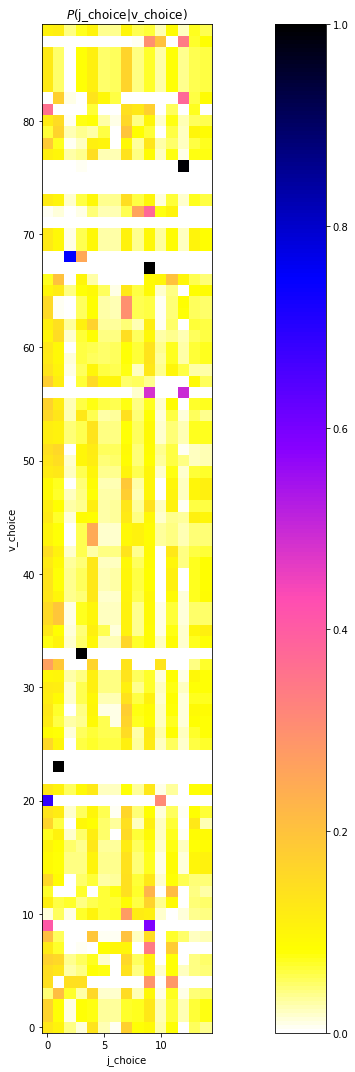

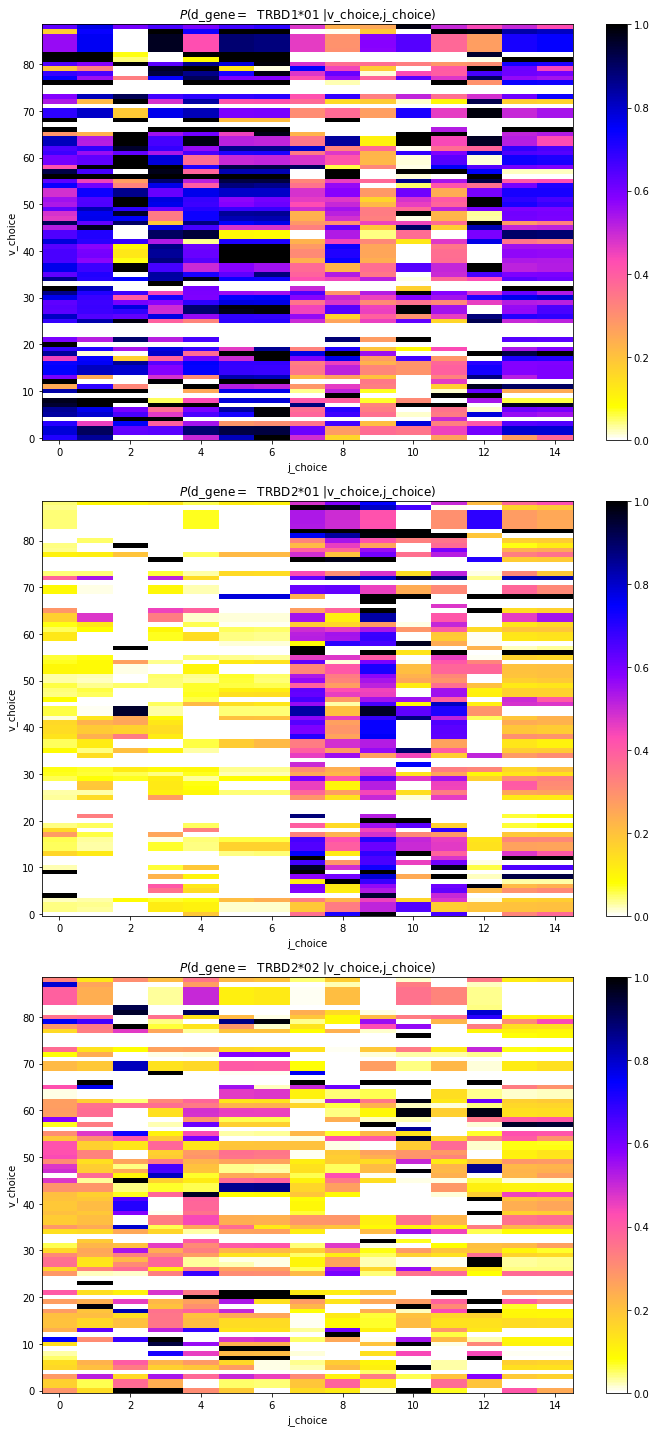

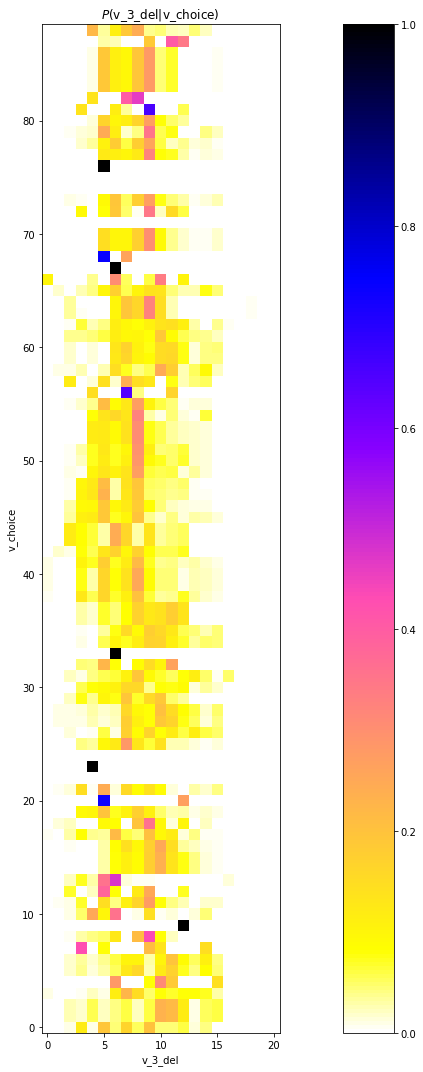

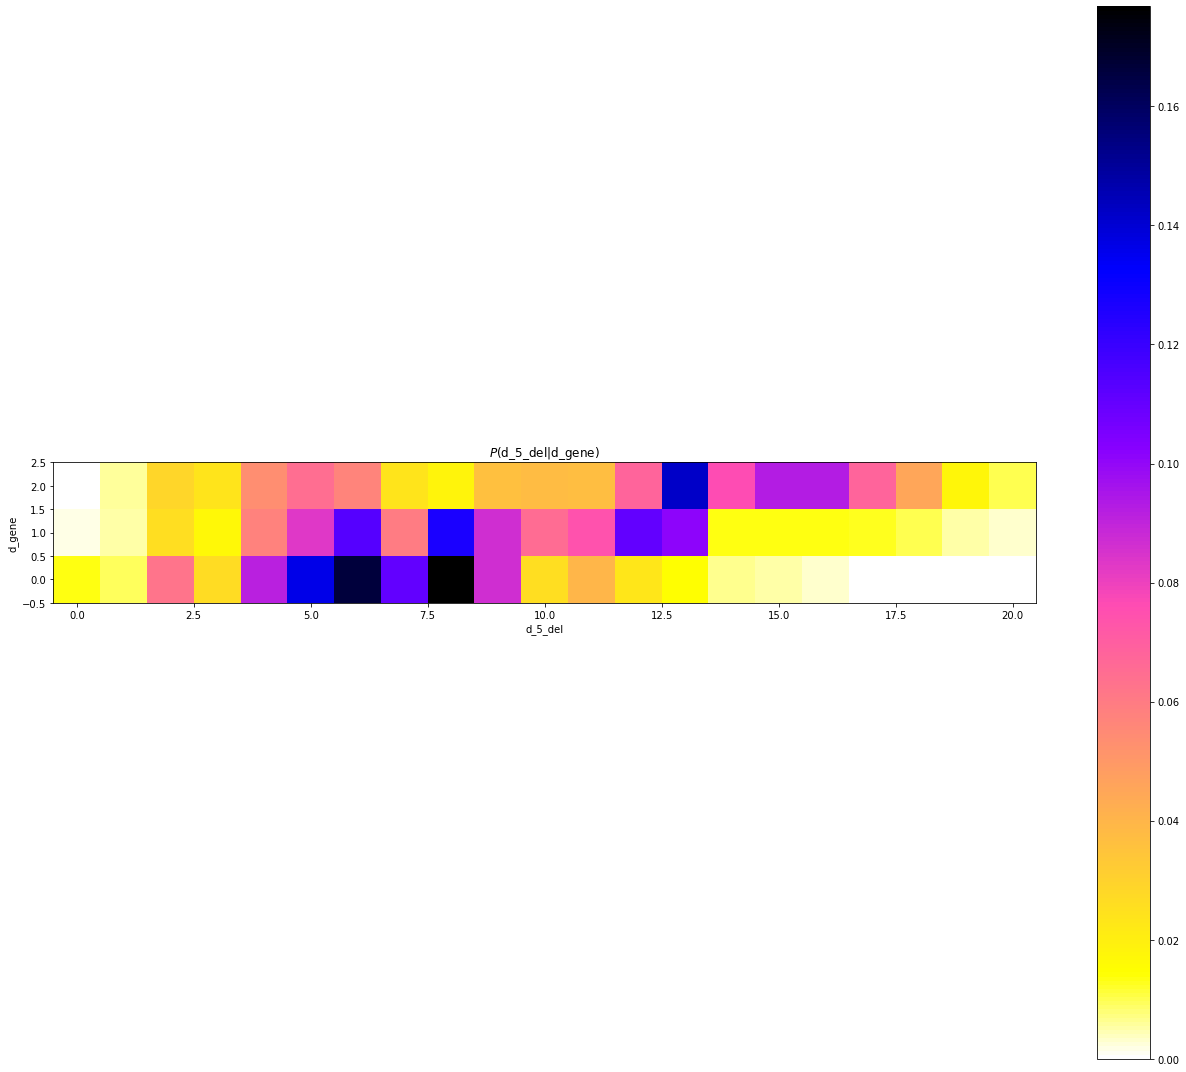

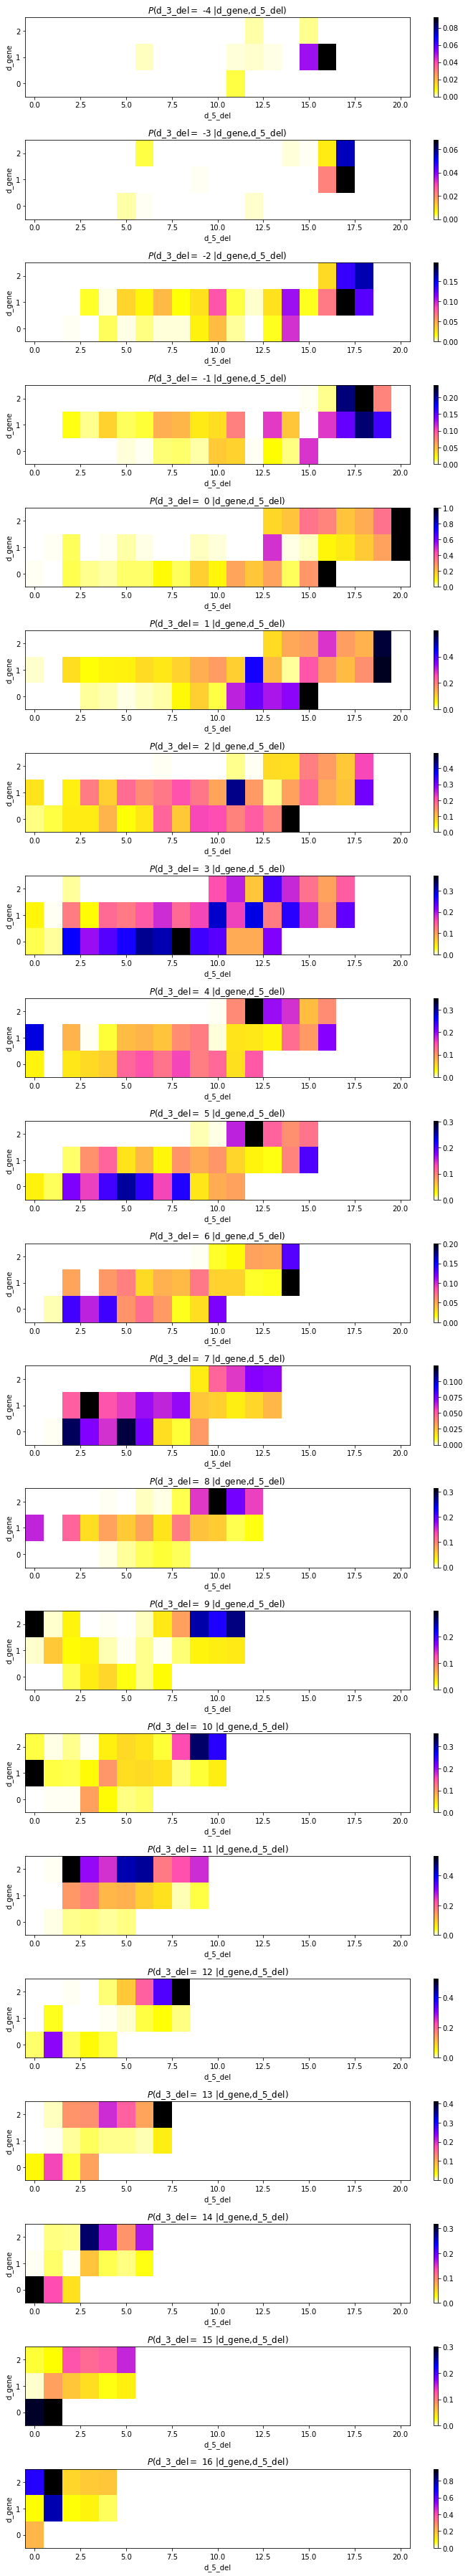

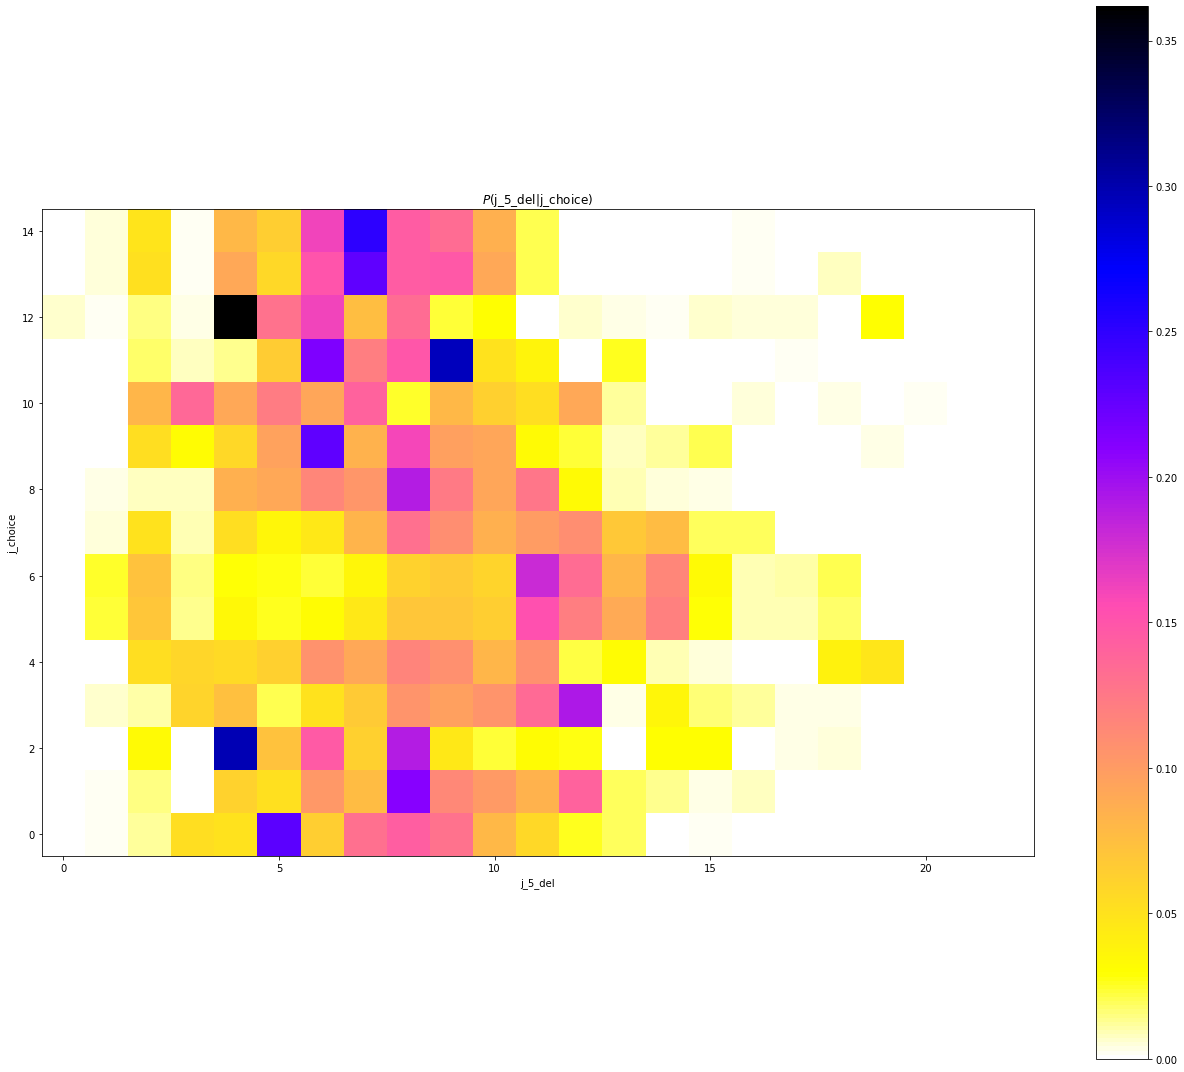

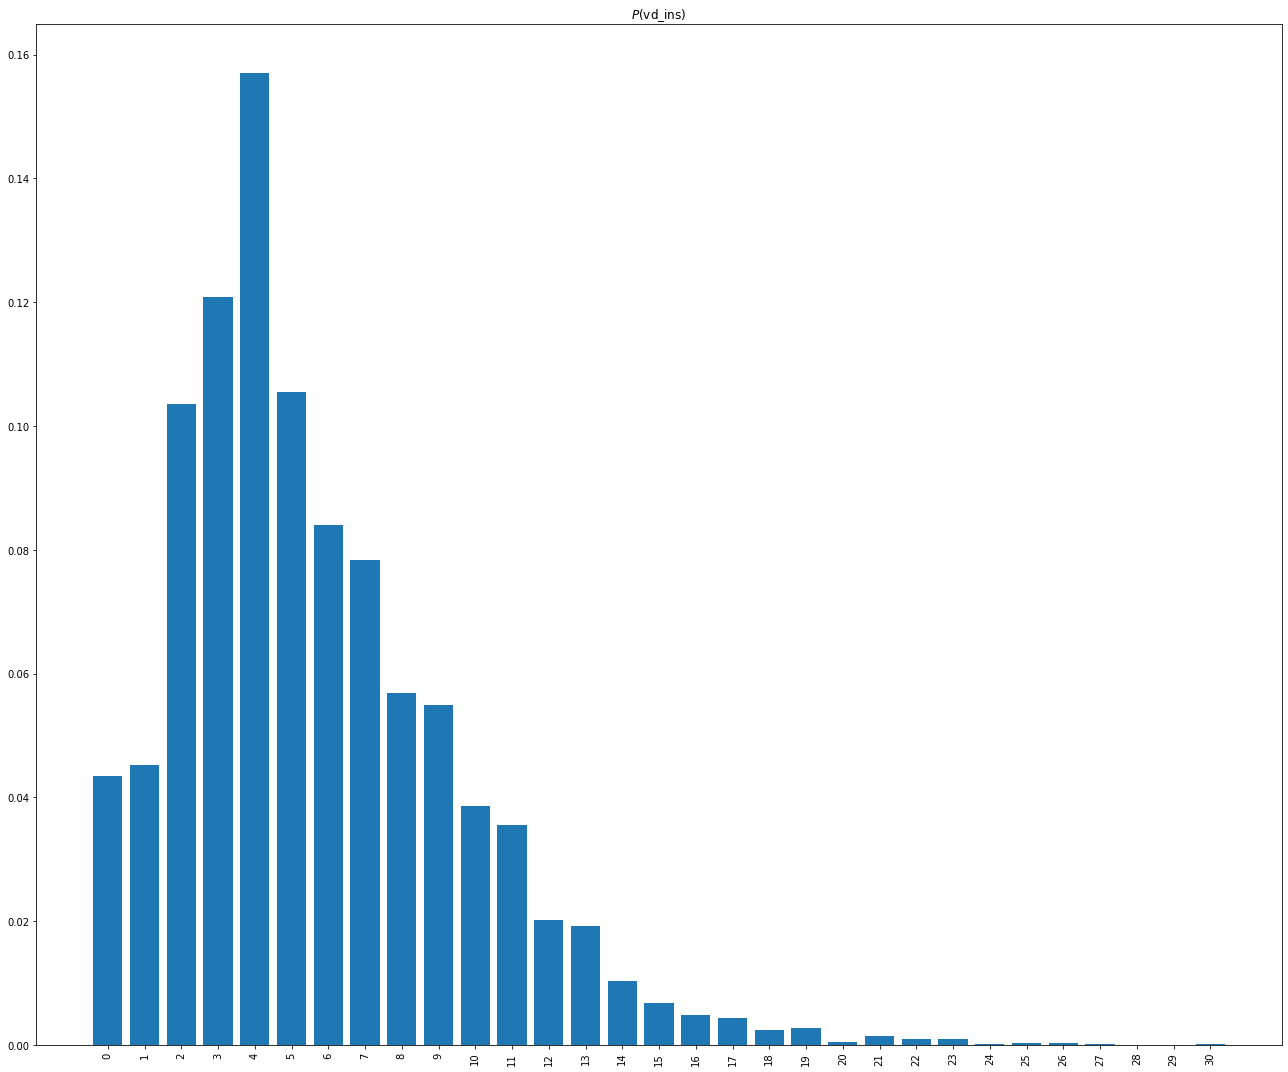

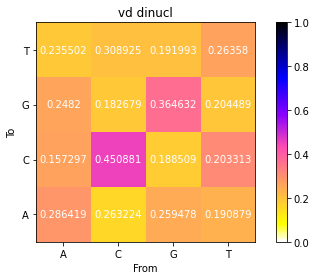

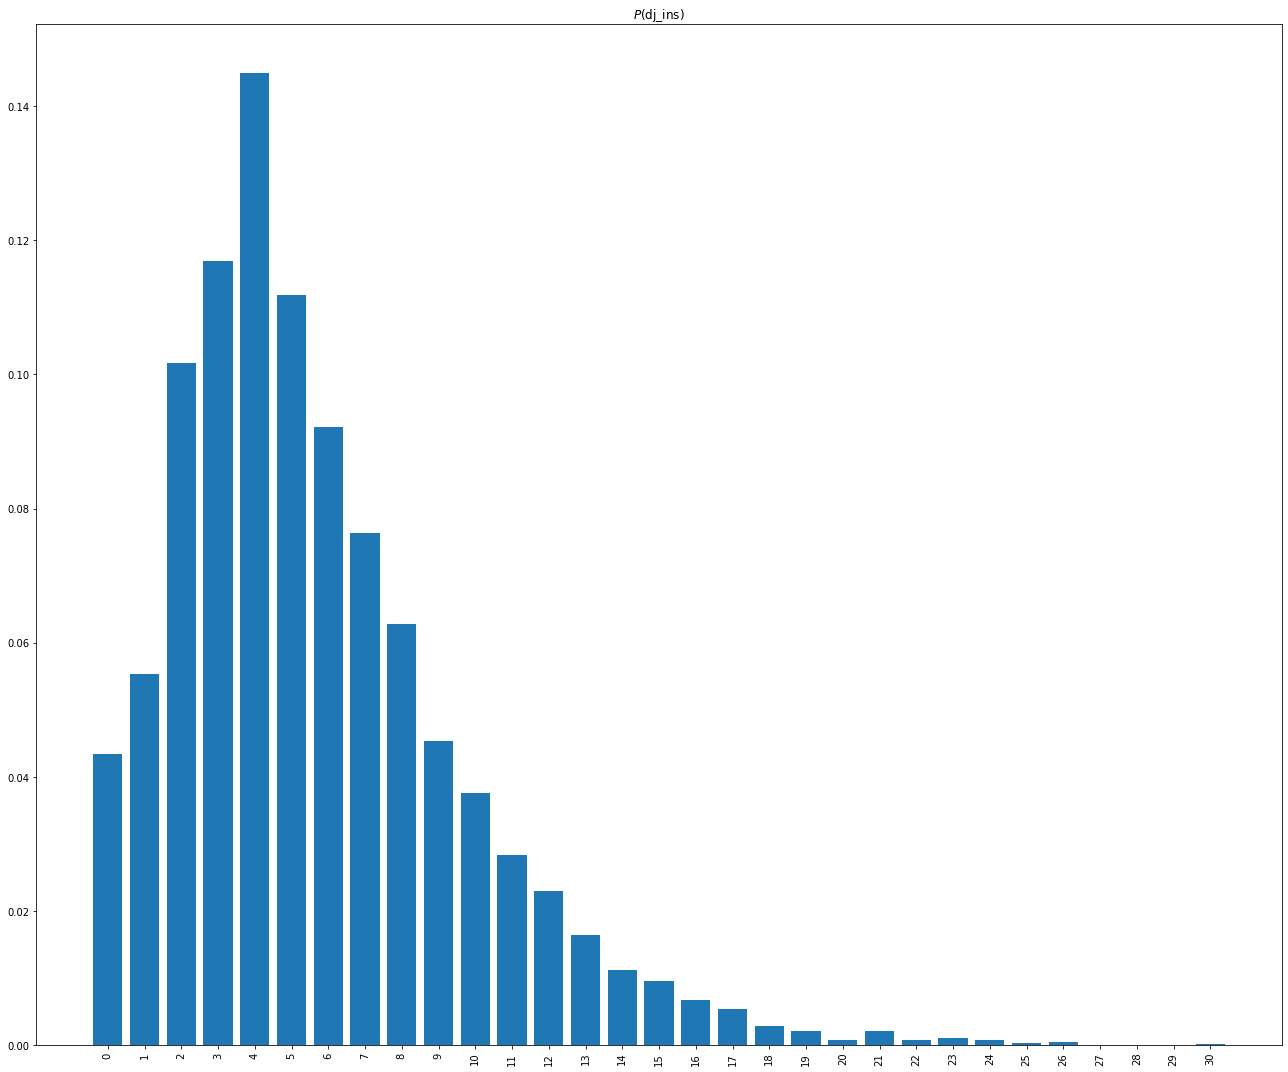

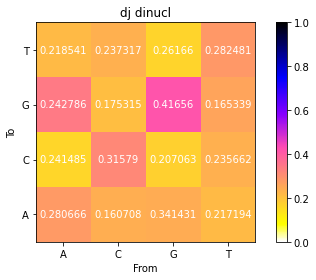

In [3]:
mdl_hb.export_plot_Pconditionals('hb_CP')

In [4]:
P_J_g_V = mdl_hb['j_choice']
P_J_g_V

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[1.28586e-01, 1.04003e-01, 4.10916e-02, ..., 0.00000e+00,
        5.36364e-02, 3.73186e-02],
       [1.66126e-01, 7.89615e-02, 1.13701e-02, ..., 2.46074e-02,
        6.49049e-02, 7.46140e-02],
       [1.66156e-01, 7.90103e-02, 1.13744e-02, ..., 2.45354e-02,
        6.49334e-02, 7.46554e-02],
       ...,
       [1.24050e-01, 4.76394e-02, 0.00000e+00, ..., 3.52196e-02,
        5.51254e-02, 6.01472e-02],
       [3.64941e-06, 2.04721e-09, 0.00000e+00, ..., 3.41728e-01,
        6.84855e-02, 8.22442e-02],
       [1.06077e-01, 1.13773e-01, 4.03129e-02, ..., 2.20679e-02,
        7.16947e-02, 5.81105e-02]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) <U11 'TRBV1*01' 'TRBV10-1*01' ... 'TRBV9*01'
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) <U10 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRBJ2-7*02'
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

In [5]:
P_J_g_V[{'j_choice': 3, 'v_choice': 7}]

<xarray.DataArray ()>
array(0.0052083)
Coordinates:
    v_choice       int64 7
    lbl__v_choice  <U11 'TRBV11-1*01'
    seq__v_choice  object 'GAAGCTGAAGTTGCCCAGTCCCCCAGATATAAGATTACAGAGAAAAGCCA...
    j_choice       int64 3
    lbl__j_choice  <U10 'TRBJ1-4*01'
    seq__j_choice  object 'CAACTAATGAAAAACTGTTTTTTGGCAGTGGAACCCAGCTCTCTGTCTTGG'
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

(<Figure size 1296x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'$P($j_choice$|$v_choice$)$'}, xlabel='j_choice', ylabel='v_choice'>)

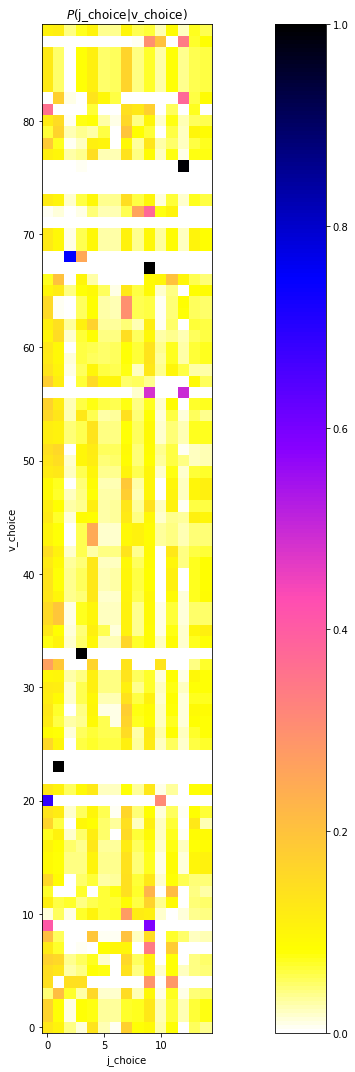

In [6]:
mdl_hb.plot_Event('j_choice')

### Marginal probabilities
Examples of marginals probabilities

$ P(J) = \sum_V P(J|V) P(V) $

$ P(D) = \sum_V P(D|V, J) P(V,J) $

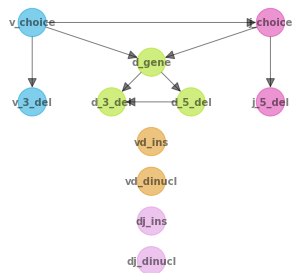

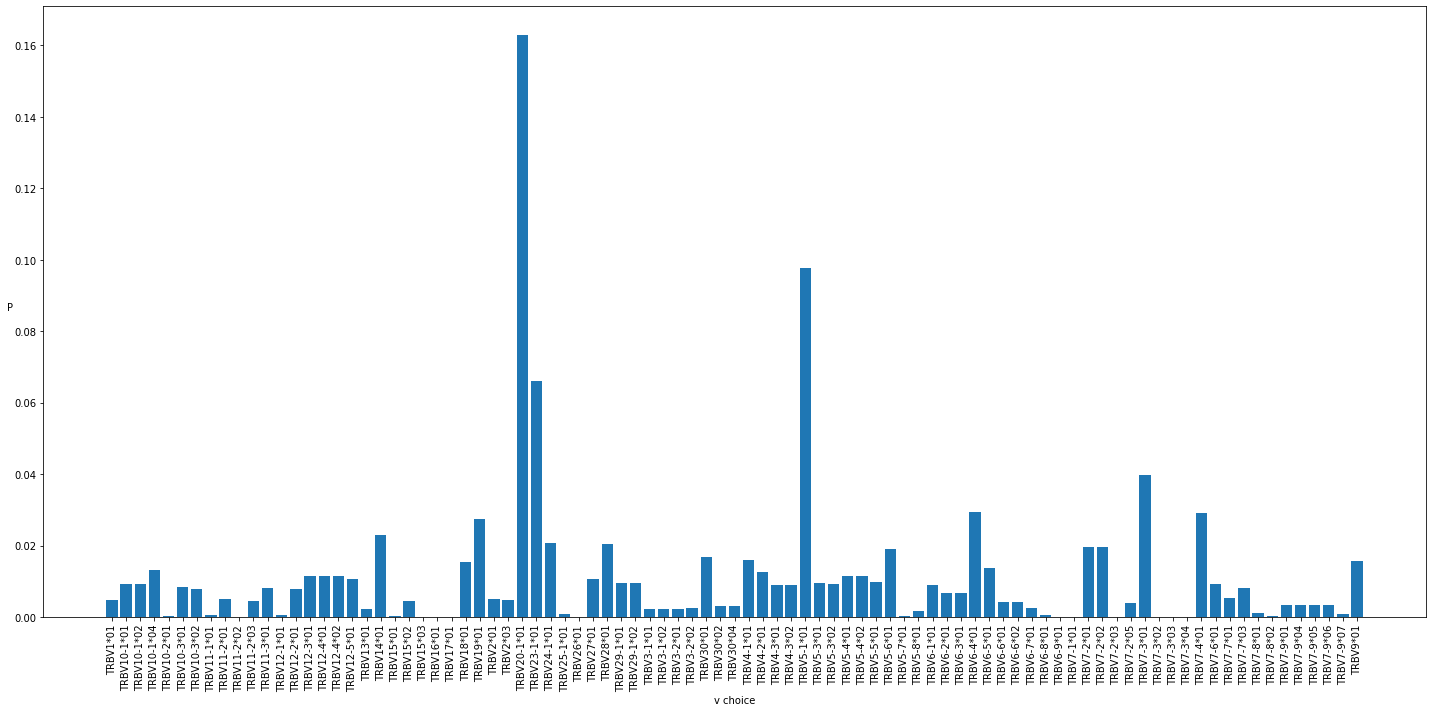

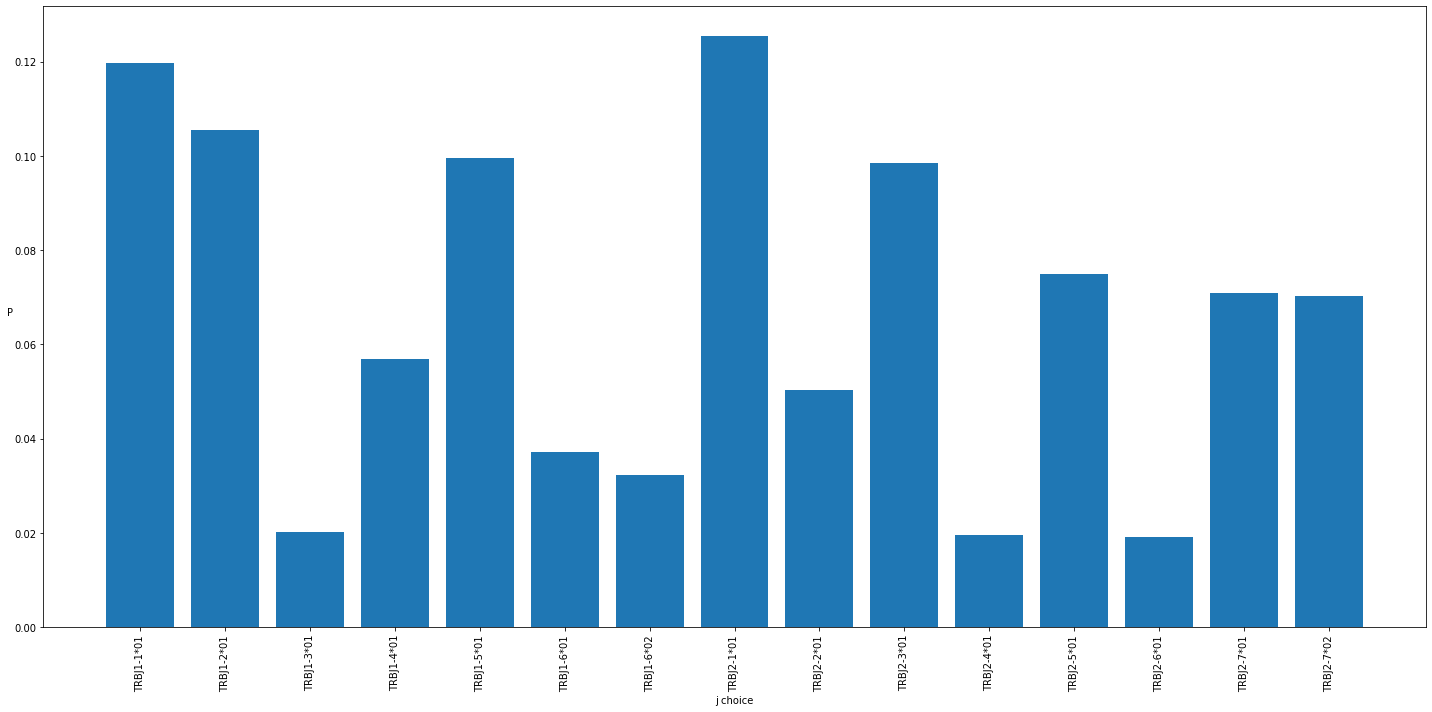

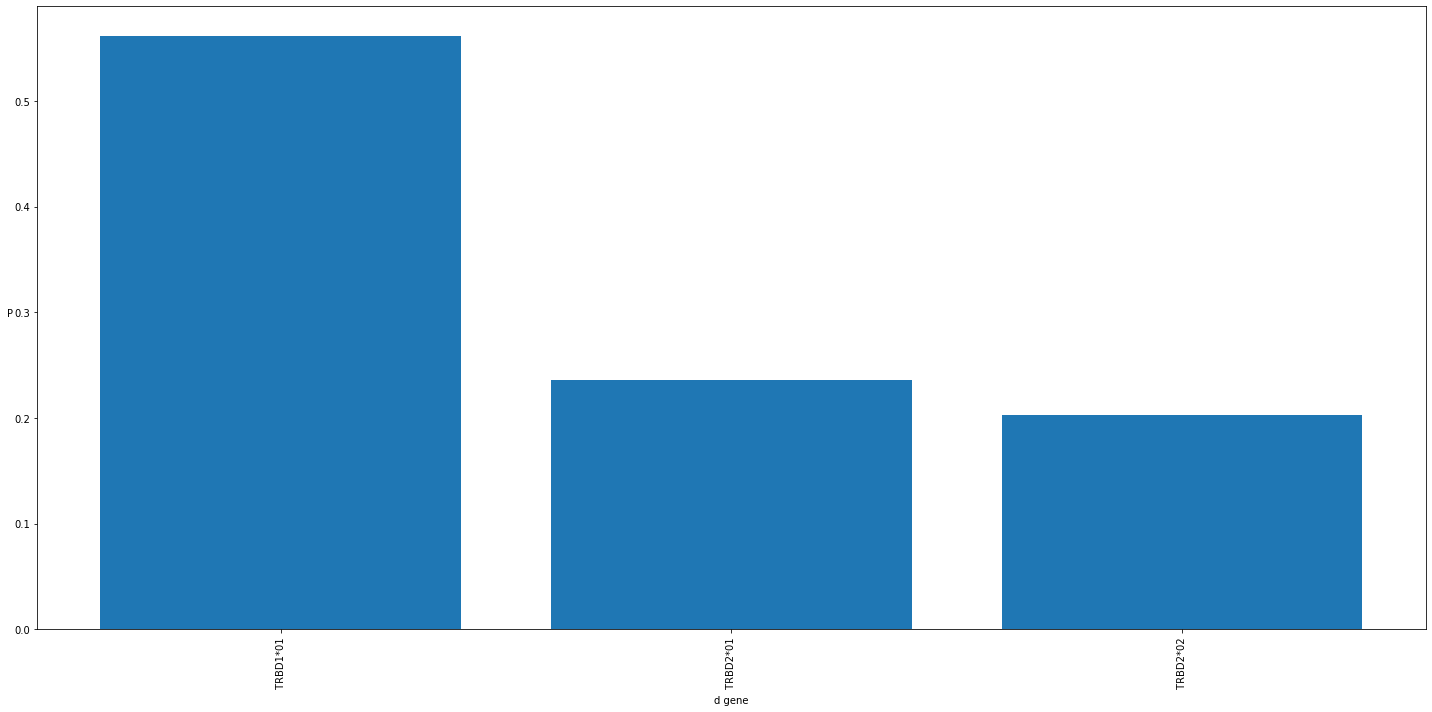

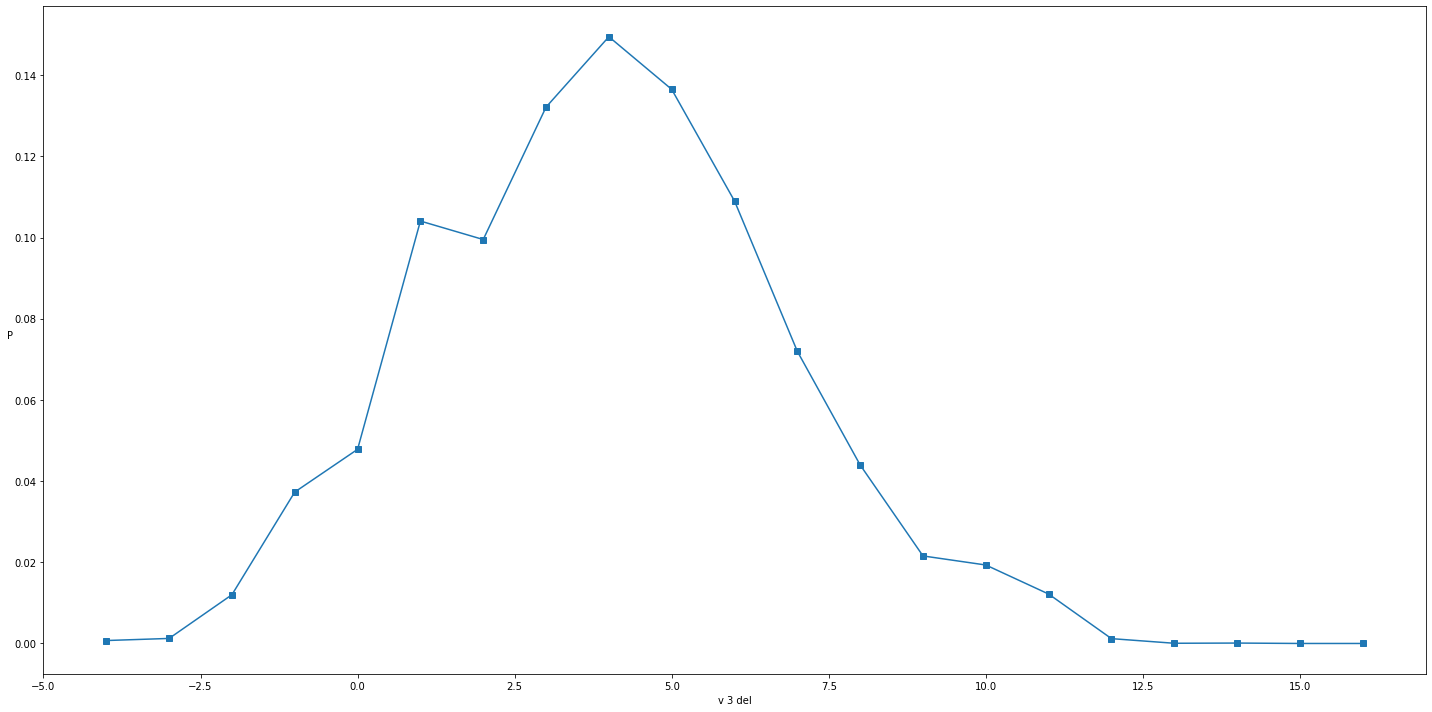

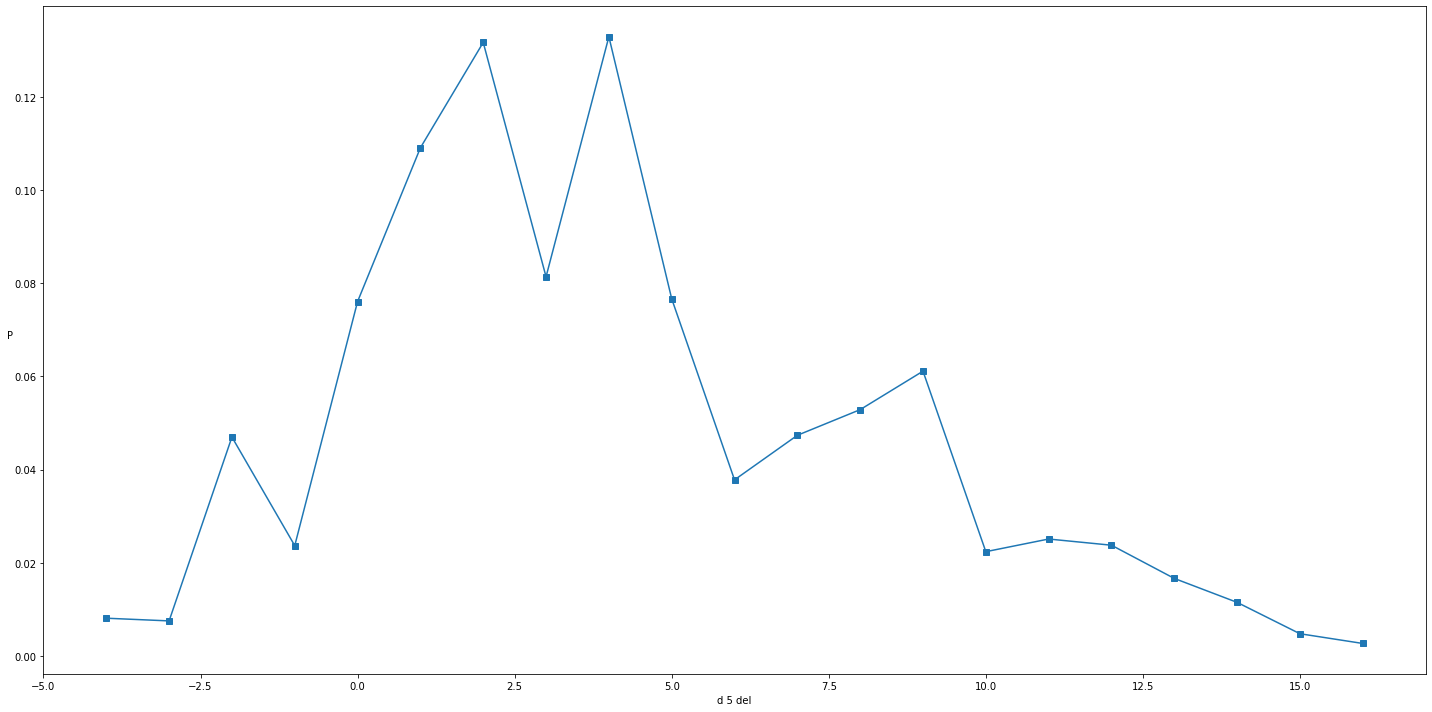

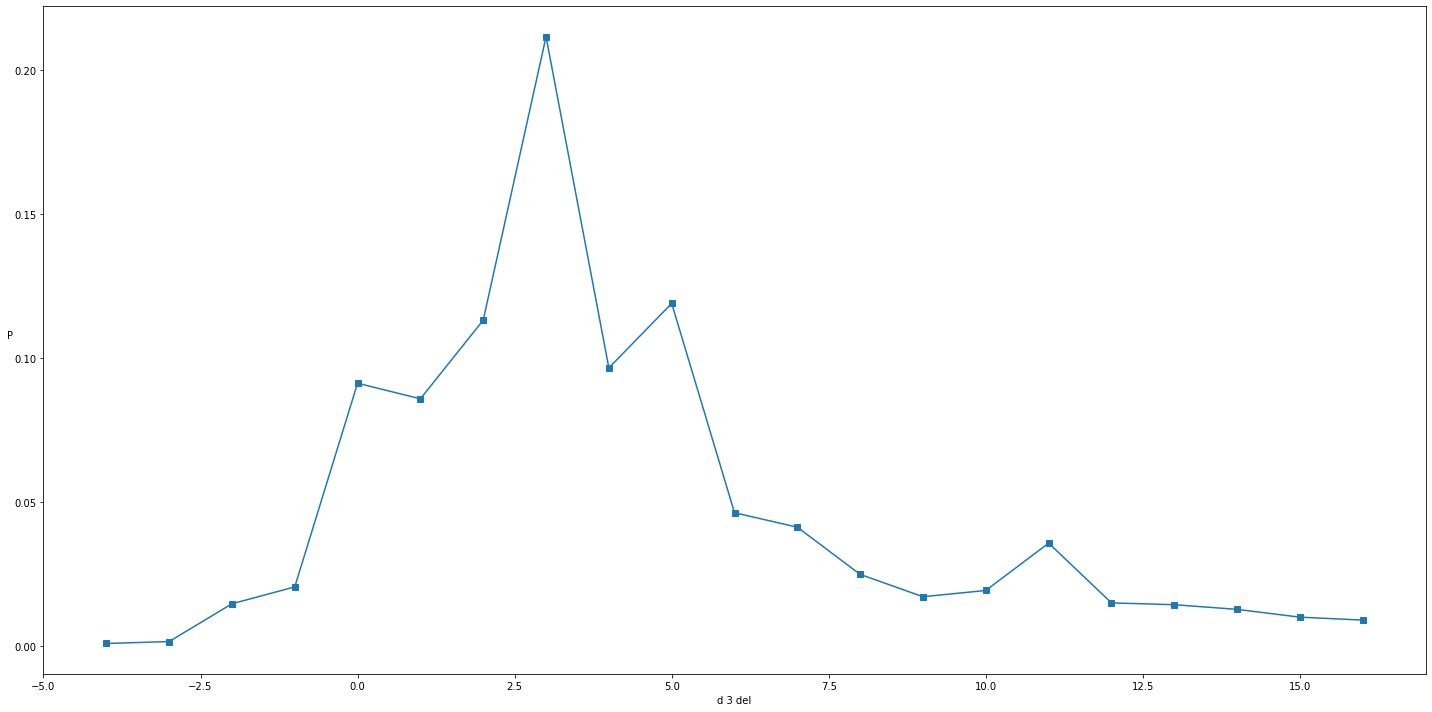

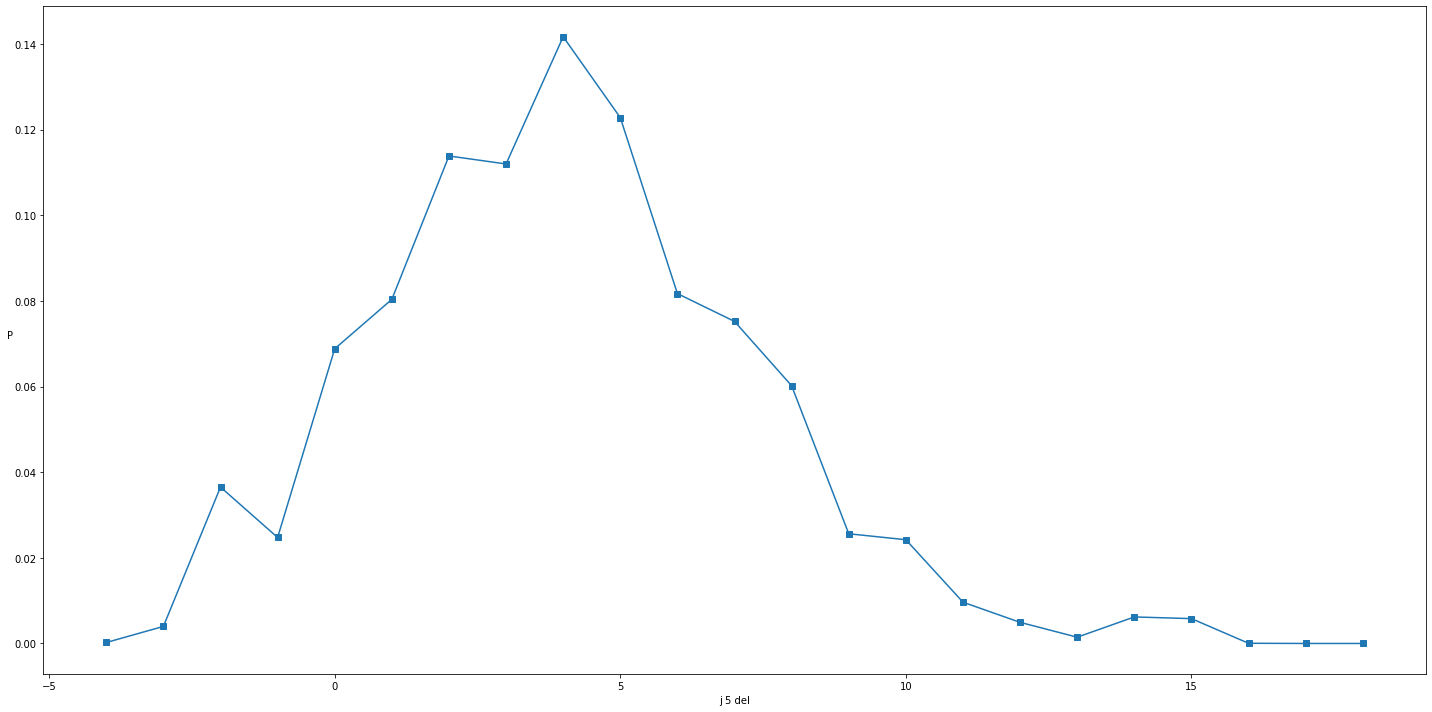

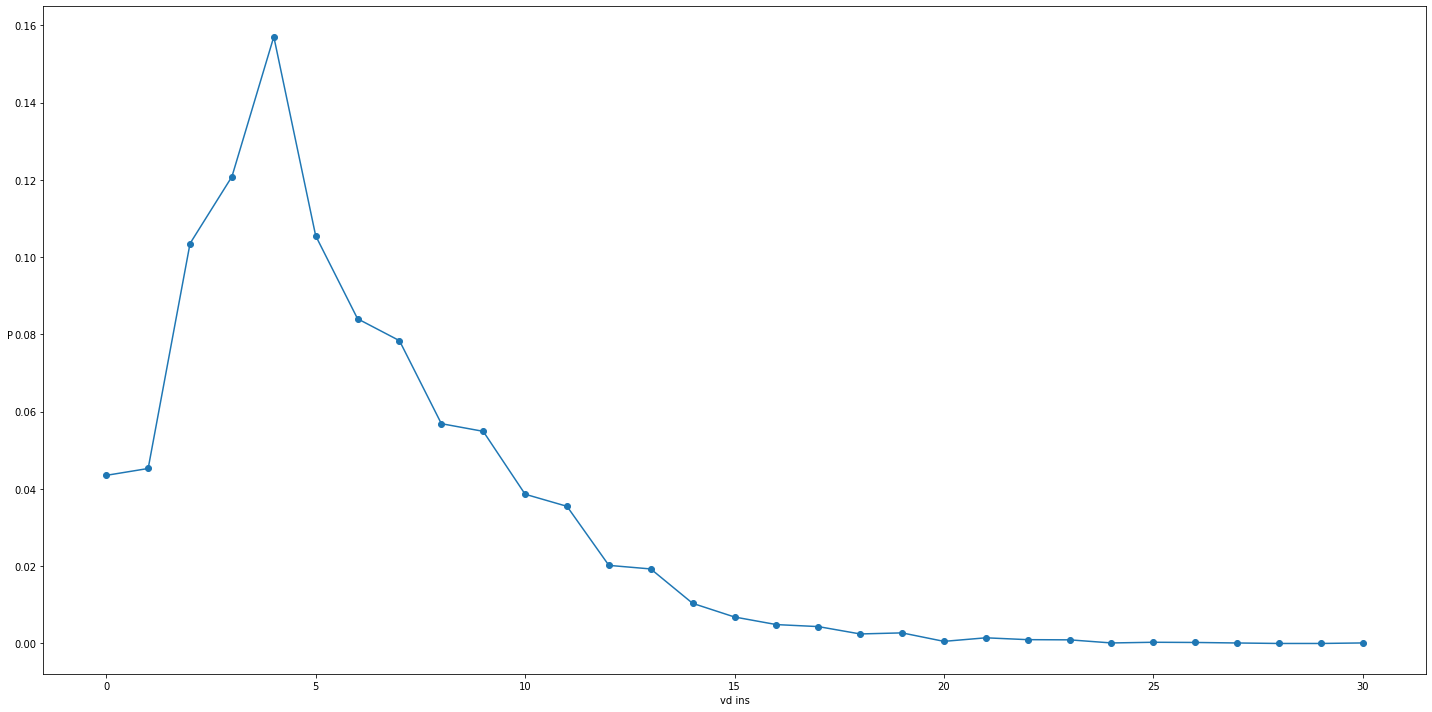

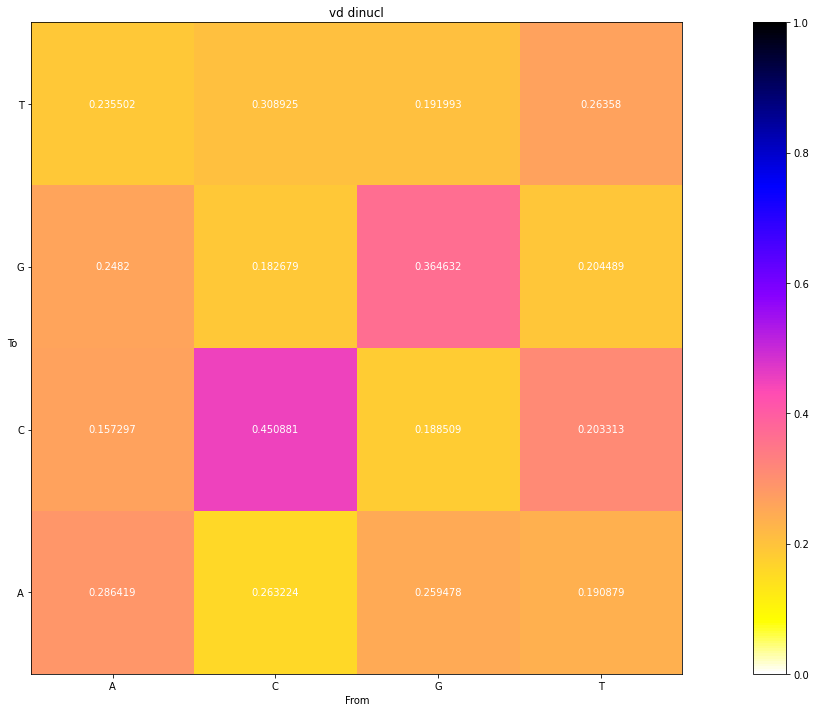

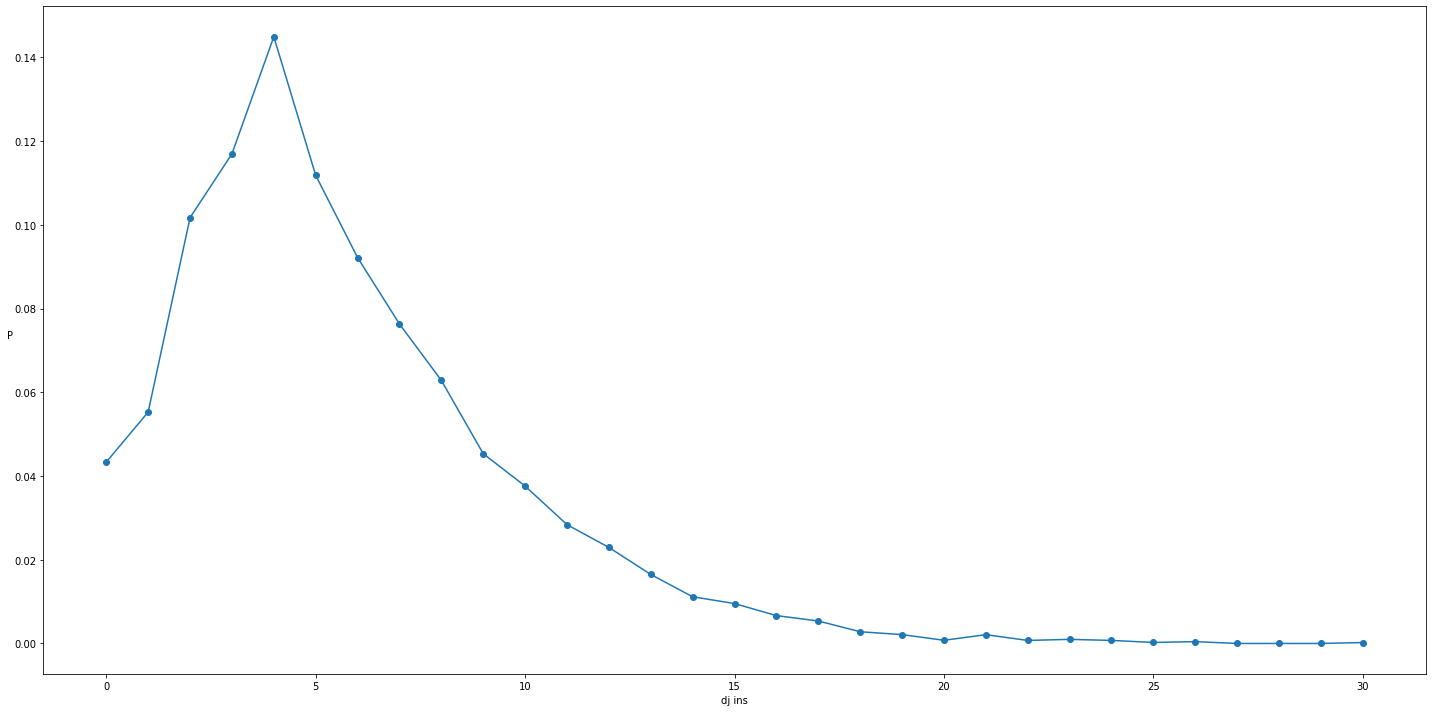

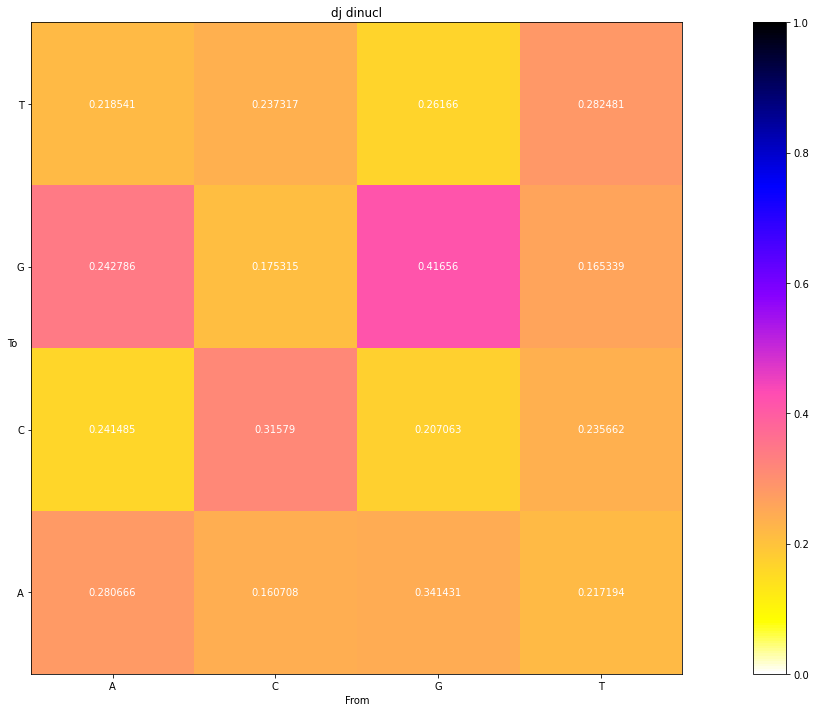

In [7]:
mdl_hb.export_plot_Pmarginals('hb_MP')

In [8]:
mdl_hb.Pmarginal['j_choice']

<xarray.DataArray (j_choice: 15)>
array([0.1196221 , 0.105381  , 0.02016193, 0.05684022, 0.09945699,
       0.03726755, 0.03223616, 0.12542481, 0.05034467, 0.09853413,
       0.0194823 , 0.07500332, 0.01905345, 0.0709004 , 0.07029394])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

<AxesSubplot:xlabel='j choice', ylabel='P'>

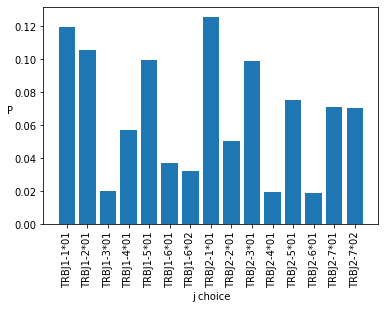

In [9]:
mdl_hb.plot_Event_Marginal('j_choice')

### Joint Probabilities

In [10]:
P_V_J = mdl_hb.get_P_joint(['v_choice', 'j_choice'])
P_V_J

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[6.28453463e-04, 5.08306114e-04, 2.00831906e-04, ...,
        0.00000000e+00, 2.62143710e-04, 1.82391677e-04],
       [1.54890932e-03, 7.36213918e-04, 1.06011576e-04, ...,
        2.29432410e-04, 6.05154843e-04, 6.95679479e-04],
       [1.54900602e-03, 7.36581450e-04, 1.06039046e-04, ...,
        2.28733827e-04, 6.05348578e-04, 6.95983268e-04],
       ...,
       [4.05407259e-04, 1.55690174e-04, 0.00000000e+00, ...,
        1.15101267e-04, 1.80155267e-04, 1.96566942e-04],
       [3.00565952e-09, 1.68608515e-12, 0.00000000e+00, ...,
        2.81447867e-04, 5.64048061e-05, 6.77364474e-05],
       [1.65903669e-03, 1.77940202e-03, 6.30491475e-04, ...,
        3.45140763e-04, 1.12130116e-03, 9.08844648e-04]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...
    lbl__v_choice  (v_choice) <U11 'TRBV1*01' 'TRBV10-1*01' ... 'TRBV9*01'
    lbl__j_choice  (j_choice) <U10 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRBJ2-7*02'

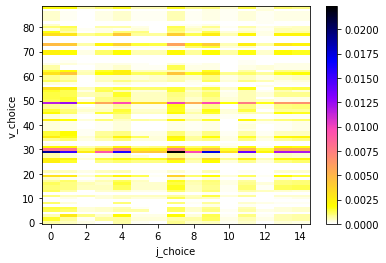

In [11]:
P_V_J.plot(cmap='gnuplot2_r')

### Entropy
$H = -P(\vec{E})\sum_{\vec{E}} \log_2 P(\vec{E})$

<AxesSubplot:>

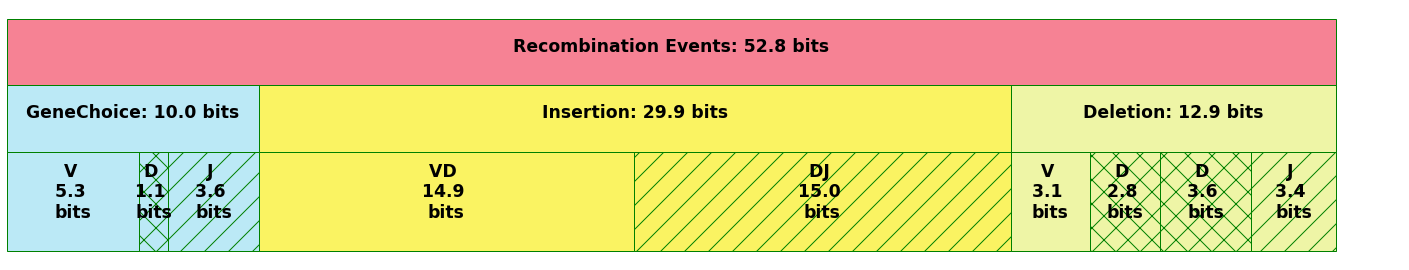

In [12]:
mdl_hb.plot_recombination_entropy()

In [13]:
mdl_hb.get_df_entropy_decomposition()

,event_nickname,event_type,seq_type,entropy
0,v_choice,GeneChoice,V_gene,5.252905
1,d_gene,GeneChoice,D_gene,1.141779
2,j_choice,GeneChoice,J_gene,3.609102
3,vd_ins,Insertion,VD_genes,14.894931
4,dj_ins,Insertion,DJ_gene,14.981991
5,v_3_del,Deletion,V_gene,3.147511
6,d_3_del,Deletion,D_gene,2.778230
7,d_5_del,Deletion,D_gene,3.634137
8,j_5_del,Deletion,J_gene,3.356340


<AxesSubplot:>

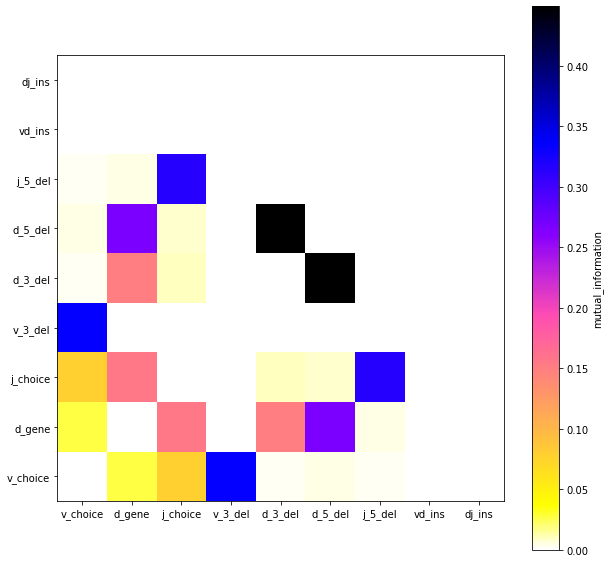

In [14]:
da_mi = mdl_hb.get_mutual_information()
mdl_hb.plot_mutual_information(da_mi)

## Evaluate Sequences

In [15]:
str_seq = "TTGAAATGTGAACAACATCTGGGTCATAACGCTATGTATTGGTACAAGCAAAGTGCTAAGAAGCCACTGGAGCTCATGTTTGTCTACAGTCTTGAAGAACGGGTTGAAAACAACAGTGTGCCAAGTCGCTTCTCACCTGAATGCCCCAACAGCTCTCACTTATCCCTTCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTGTATCTCTGCGCCAGCAGCCGTAGGCGAGCGCGGCGGGGAGCTGTTTTTTGGAGAAGGCTCTAGGCTGACCGTACTGG"
str_seq

'TTGAAATGTGAACAACATCTGGGTCATAACGCTATGTATTGGTACAAGCAAAGTGCTAAGAAGCCACTGGAGCTCATGTTTGTCTACAGTCTTGAAGAACGGGTTGAAAACAACAGTGTGCCAAGTCGCTTCTCACCTGAATGCCCCAACAGCTCTCACTTATCCCTTCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTGTATCTCTGCGCCAGCAGCCGTAGGCGAGCGCGGCGGGGAGCTGTTTTTTGGAGAAGGCTCTAGGCTGACCGTACTGG'

In [16]:
df_scens = p3.evaluate(str_seq, mdl_hb, N_scenarios=10, igor_wd='tmp', batch_clean=False)

Writing model parms in file  tmp/dataIGoRrUn7rDfYiq_mdldata/models/model_parms.txt
Writing model marginals in file  tmp/dataIGoRrUn7rDfYiq_mdldata/models/model_marginals.txt
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata/ref_genome/J_gene_CDR3_anchors.csv
Writing model parms in file  tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_parms.txt
Writing model marginals in file  tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_marginals.txt
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd tmp -batch dataIGoRrUn7rDfYiq -read_seqs tmp/dataIGoRrUn7rDfYiqinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd tmp -batch dataIGoRrUn7rDfYiq -set_genomic  --V tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/genomicV

Batch name set to: dataIGoRrUn7rDfYiq_
Working directory set to: "tmp/"
Performing V alignments....
V_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing D alignments....
D_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing J alignments....
J_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing CDR3 sequence extraction ....


Writing model parms in file  tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_parms.txt
Writing model marginals in file  tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_marginals.txt
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd tmp -batch dataIGoRrUn7rDfYiq -set_custom_model tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_parms.txt tmp/dataIGoRrUn7rDfYiq_mdldata//models/model_marginals.txt -set_CDR3_anchors  --V tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/V_gene_CDR3_anchors.csv --J tmp/dataIGoRrUn7rDfYiq_mdldata//ref_genome/J_gene_CDR3_anchors.csv -evaluate  -output  --scenarios 10  --Pgen  
igor_fln_generated_realizations_werr:  tmp/dataIGoRrUn7rDfYiq_output/best_scenarios_counts.csv


The column scenario_proba_cond_seq gives us

$ P(\text{scenario}|\sigma) $

and the event columns provide us the selected parameter for the scenarios

$ P(\text{scenario}) = P(\text{v_choice}_{id}) \times P(\text{j_choice}_\text{id}|\text{v_choice}_{id}) \times P(\text{d_gene}_\text{id} | \text{j_choice}_\text{id}, \text{v_choice}_\text{id}) ... $

In [17]:
df_scens

,scenario_rank,scenario_proba_cond_seq,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Mismatches,Pgen_estimate
seq_index,,,,,,,,,,,,,,,
0,1,0.178551,48,8,1,8,10,11,10,7,"[2, 3, 0, 2, 2, 1, 2]",3,"[2, 2, 1]",[],1.426210e-16
0,2,0.071263,48,8,0,8,9,11,8,2,"[2, 3]",9,"[2, 2, 1, 2, 1, 2, 0, 2, 1]",[],1.426210e-16
0,3,0.060515,48,8,0,8,13,11,4,3,"[2, 3, 0]",8,"[2, 2, 1, 2, 1, 2, 0, 2]",[],1.426210e-16
0,4,0.042415,48,8,1,8,11,11,9,10,"[2, 3, 0, 2, 2, 1, 2, 0, 2, 1]",0,[],[],1.426210e-16
0,5,0.038252,48,8,1,8,11,11,10,4,"[2, 3, 0, 2]",7,"[2, 2, 1, 2, 1, 2, 0]",[],1.426210e-16
0,6,0.036261,48,8,1,8,11,11,10,8,"[2, 3, 0, 2, 2, 1, 2, 0]",3,"[2, 2, 1]",[],1.426210e-16
0,7,0.030704,48,8,2,8,15,11,6,6,"[2, 3, 0, 2, 2, 1]",5,"[2, 2, 1, 2, 1]",[],1.426210e-16
0,8,0.028821,48,8,1,8,10,11,11,7,"[2, 3, 0, 2, 2, 1, 2]",4,"[2, 2, 1, 2]",[],1.426210e-16
0,9,0.019521,48,8,2,8,16,11,5,2,"[2, 3]",9,"[2, 2, 1, 2, 1, 2, 0, 2, 1]",[],1.426210e-16


### Visualize a scenario

<AxesSubplot:>

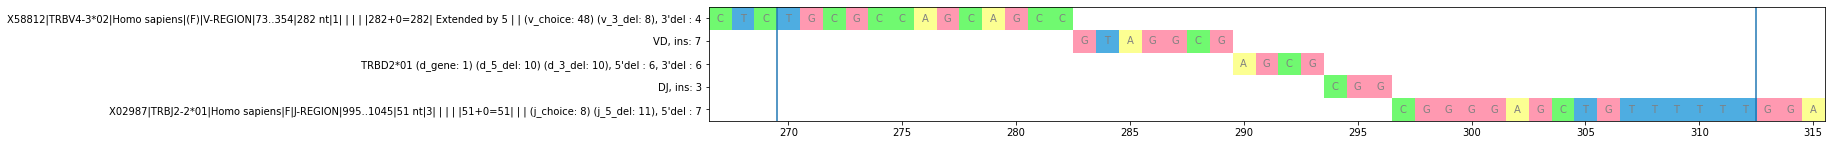

In [18]:
ps_scenario = df_scens.iloc[0]
ps_scenario
mdl_hb.plot_scenario(ps_scenario)

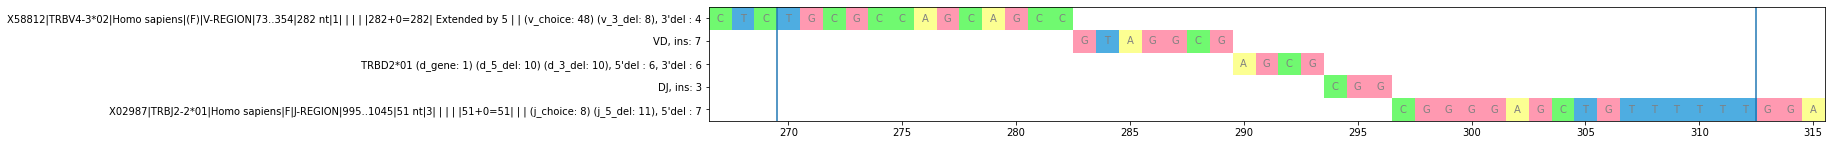

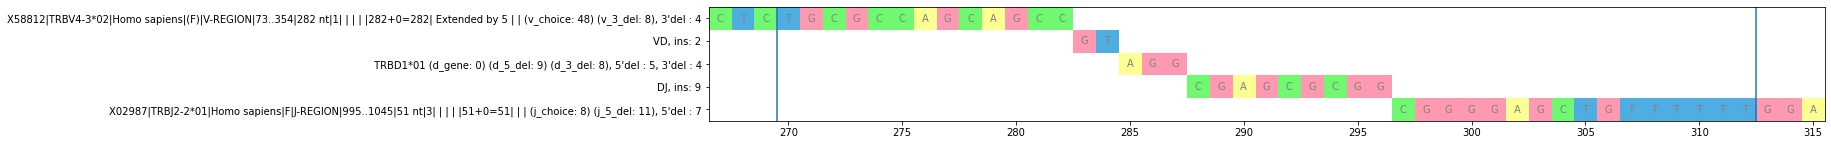

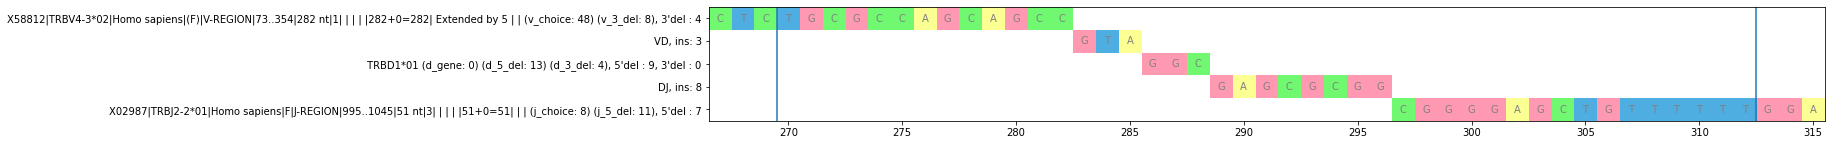

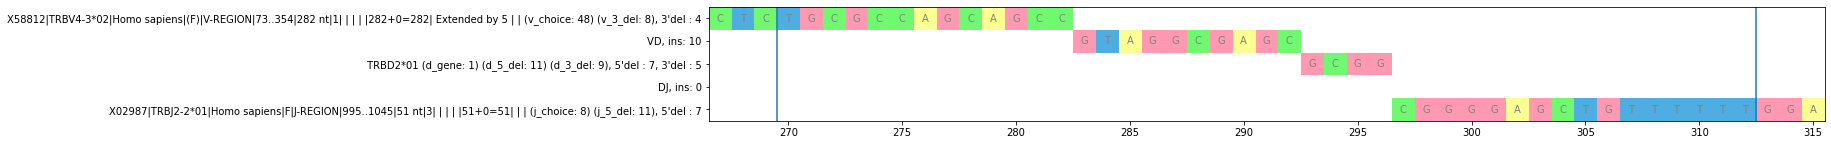

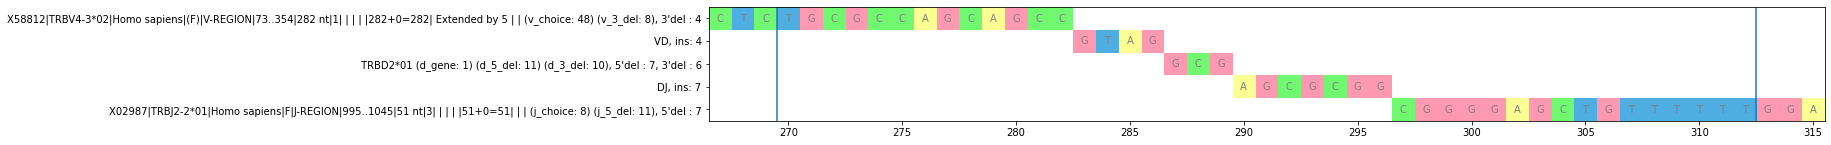

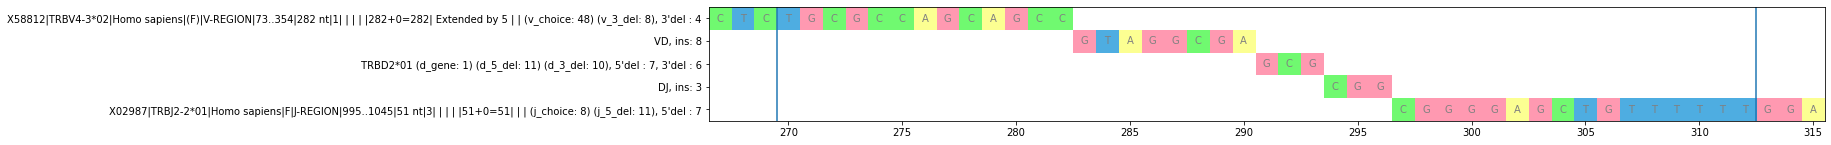

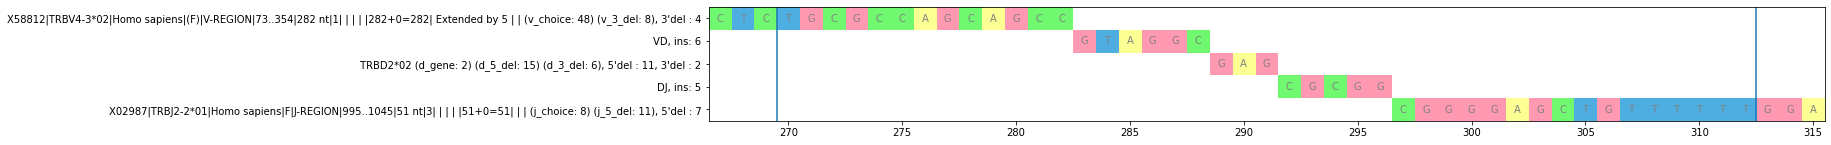

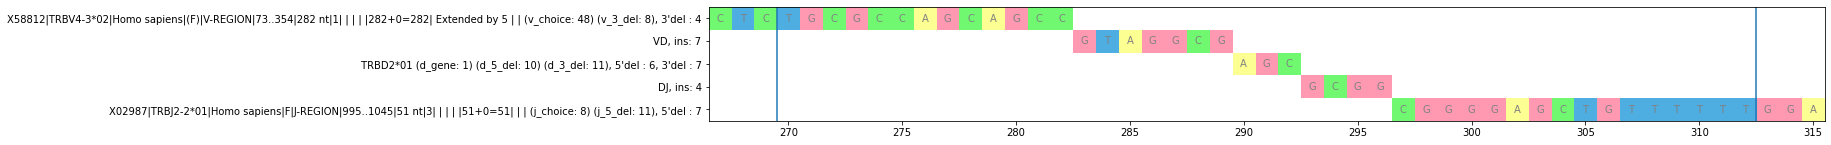

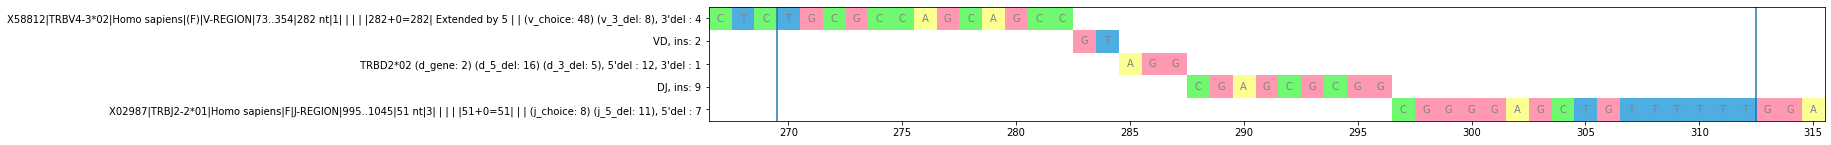

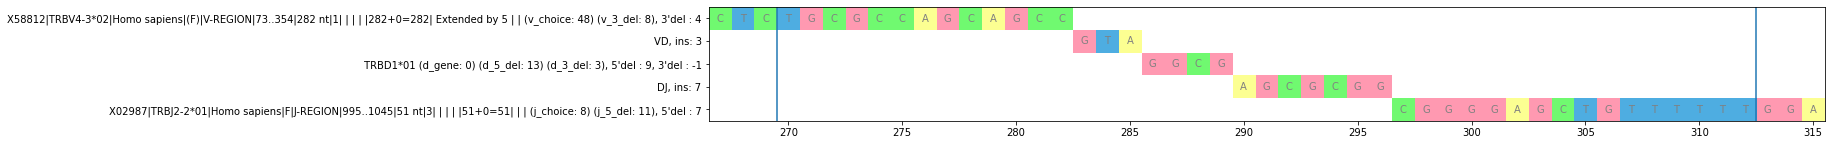

In [19]:
# ps_scenario = df_scens.iloc[0]
for index, ps_scenario in df_scens.iterrows():
    mdl_hb.plot_scenario(ps_scenario)

In [20]:
mdl_hb.genomic_dataframe_dict['J']

,name,value,anchor_index
id,,,
0,K02545|TRBJ1-1*01|Homo sapiens|F|J-REGION|749....,TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCACAGTTGTAG,17
1,K02545|TRBJ1-2*01|Homo sapiens|F|J-REGION|886....,CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG,17
2,M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499...,CTCTGGAAACACCATATATTTTGGAGAGGGAAGTTGGCTCACTGTT...,19
3,M14158|TRBJ1-4*01|Homo sapiens|F|J-REGION|2095...,CAACTAATGAAAAACTGTTTTTTGGCAGTGGAACCCAGCTCTCTGT...,20
4,M14158|TRBJ1-5*01|Homo sapiens|F|J-REGION|2368...,TAGCAATCAGCCCCAGCATTTTGGTGATGGGACTCGACTCTCCATC...,19
5,M14158|TRBJ1-6*01|Homo sapiens|F|J-REGION|2859...,CTCCTATAATTCACCCCTCCACTTTGGGAATGGGACCAGGCTCACT...,22
6,L36092|TRBJ1-6*02|Homo sapiens|F|J-REGION|6430...,CTCCTATAATTCACCCCTCCACTTTGGGAACGGGACCAGGCTCACT...,22
7,X02987|TRBJ2-1*01|Homo sapiens|F|J-REGION|800....,CTCCTACAATGAGCAGTTCTTCGGGCCAGGGACACGGCTCACCGTG...,19
8,X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995....,CGAACACCGGGGAGCTGTTTTTTGGAGAAGGCTCTAGGCTGACCGT...,20


## Generating random sequences from model

In [21]:
df_gen_seqs = p3.generate(Nseqs=10, mdl=mdl_hb)
df_gen_seqs

Writing model parms in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata/models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata/ref_genome/J_gene_CDR3_anchors.csv
Writing model parms in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata//models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata//ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_u_gmyr0_/dataIGoRdx2C1EIkND_mdldata//ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd ./igor_generating_u_gmyr0_ -batch dat

,nt_sequence
seq_index,
0,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...
1,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...
2,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
3,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...
4,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
5,AATGCCGGCGTCATGCAGAACCCAAGACACCTGGTCAGGAGGAGGG...
6,GATGCTGATGTTACCCAGACCCCAAGGAATAGGATCACAAAGACAG...
7,AATGCTGGTGTCACTCAGACCCCAAAATTCCGGGTCCTGAAGACAG...
8,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...


In [22]:
df_gen_seqs = p3.generate(Nseqs=10, mdl=mdl_hb, return_scenarios=True)
df_gen_seqs

Writing model parms in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata/models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata/ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata/ref_genome/J_gene_CDR3_anchors.csv
Writing model parms in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata//models/model_marginals.txt
Writing gene anchor's in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata//ref_genome/V_gene_CDR3_anchors.csv
Writing gene anchor's in file  ./igor_generating_wwkgcy8c/dataIGoRWb17vmfBGo_mdldata//ref_genome/J_gene_CDR3_anchors.csv
/home/olivares/.local/bin/igor -set_wd ./igor_generating_wwkgcy8c -batch dat

,nt_sequence,v_choice,j_choice,d_gene,v_3_del,d_5_del,j_5_del,d_3_del,vd_ins,vd_dinucl,dj_ins,dj_dinucl,Errors
seq_index,,,,,,,,,,,,,
0,GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...,26,3,0,13,7,9,8,2,"[2, 1]",4,"[2, 2, 2, 1]",[]
1,ACTGAAGTTACCCAGACACCAAAACACCTGGTCATGGGAATGACAA...,45,9,0,14,6,6,11,11,"[3, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2]",7,"[1, 3, 2, 3, 0, 2, 2]",[]
2,GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...,70,0,0,11,8,4,9,8,"[0, 2, 2, 2, 1, 2, 0, 0]",5,"[2, 2, 2, 0, 0]",[]
3,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...,30,3,0,14,3,11,8,4,"[0, 0, 0, 2]",9,"[2, 0, 1, 3, 1, 0, 0, 2, 2]",[265]
4,GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...,73,1,0,9,9,11,7,2,"[1, 1]",2,"[3, 2]",[]
5,GAGGCTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...,51,10,0,9,9,7,11,6,"[2, 1, 1, 0, 2, 3]",0,[],[]
6,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,29,4,0,7,4,12,6,3,"[3, 1, 1]",11,"[3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 2]",[]
7,GAACCTGAAGTCACCCAGACTCCCAGCCATCAGGTCACACAGATGG...,28,9,0,12,13,8,7,7,"[0, 1, 1, 3, 2, 1, 0]",0,[],[]
8,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,29,7,1,7,4,13,6,3,"[3, 1, 3]",4,"[2, 3, 3, 2]",[]


In [23]:
df_gen_seqs['nt_sequence']

seq_index
0    GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...
1    ACTGAAGTTACCCAGACACCAAAACACCTGGTCATGGGAATGACAA...
2    GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...
3    CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...
4    GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...
5    GAGGCTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...
6    GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
7    GAACCTGAAGTCACCCAGACTCCCAGCCATCAGGTCACACAGATGG...
8    GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
9    GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
Name: nt_sequence, dtype: object

## Inferring a new model

In [24]:
# FIXME: For this example we use some Emerson's data, add the reference

In [25]:
import pandas as pd
df_input = pd.read_csv('HIP00110.tsv.gz', sep='\t')
df_input

,nucleotide,aminoAcid,count (templates/reads),frequencyCount (%),cdr3Length,vMaxResolved,vFamilyName,vGeneName,vGeneAllele,vFamilyTies,vGeneNameTies,vGeneAlleleTies,dMaxResolved,dFamilyName,dGeneName,dGeneAllele,dFamilyTies,dGeneNameTies,dGeneAlleleTies,jMaxResolved,jFamilyName,jGeneName,jGeneAllele,jFamilyTies,jGeneNameTies,jGeneAlleleTies,vDeletion,n1Insertion,d5Deletion,d3Deletion,n2Insertion,jDeletion,vIndex,n1Index,dIndex,n2Index,jIndex,estimatedNumberGenomes,sequenceStatus,cloneResolved,vOrphon,dOrphon,jOrphon,vFunction,dFunction,jFunction,fractionNucleated,vAlignLength,vAlignSubstitutionCount,vAlignSubstitutionIndexes,vAlignSubstitutionGeneThreePrimeIndexes,vSeqWithMutations
0,GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...,NaN,3088,0.019194,38,TCRBV05-01*01,TCRBV05,TCRBV05-01,1.0,NaN,NaN,NaN,TCRBD01-01*01,TCRBD01,TCRBD01-01,1.0,NaN,NaN,NaN,TCRBJ01-06*01,TCRBJ01,TCRBJ01-06,1.0,NaN,NaN,NaN,4,1,5,2,5,10,43,55,60,65,66,3088,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,1772,0.010946,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,NaN,NaN,TCRBD02-01*01,TCRBD02,TCRBD02-01,1.0,NaN,NaN,NaN,TCRBJ02-03*01,TCRBJ02,TCRBJ02-03,1.0,NaN,NaN,NaN,10,12,3,2,8,8,30,37,45,56,68,1772,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,CASSLRVGGYGYTF,1763,0.010841,42,TCRBV07-09,TCRBV07,TCRBV07-09,NaN,NaN,NaN,"01,03",TCRBD02-01*01,TCRBD02,TCRBD02-01,1.0,NaN,NaN,NaN,TCRBJ01-02*01,TCRBJ01,TCRBJ01-02,1.0,NaN,NaN,NaN,2,0,8,2,5,4,39,54,59,-1,65,1763,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...,NaN,1241,0.007660,52,TCRBV01-01*01,TCRBV01,TCRBV01-01,1.0,NaN,NaN,NaN,TCRBD02-01*01,TCRBD02,TCRBD02-01,1.0,NaN,NaN,NaN,TCRBJ02-01*01,TCRBJ02,TCRBJ02-01,1.0,NaN,NaN,NaN,1,3,7,1,6,3,29,45,51,59,62,1241,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCA...,CASRRLGGLNTEAFF,985,0.006130,45,TCRBV25-01*01,TCRBV25,TCRBV25-01,1.0,NaN,NaN,NaN,TCRBD02-01*02,TCRBD02,TCRBD02-01,2.0,NaN,NaN,NaN,TCRBJ01-01*01,TCRBJ01,TCRBJ01-01,1.0,NaN,NaN,NaN,6,1,10,0,7,0,36,47,54,60,61,985,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130935,AAAAGAACCCGACAGCTTTCTATCTCTGTGCCAGTAACGCGGGTCT...,NaN,1,0.000001,55,TCRBV19-01,TCRBV19,TCRBV19-01,NaN,NaN,NaN,"01,02",TCRBD02-01,TCRBD02,TCRBD02-01,NaN,NaN,NaN,"01,02",TCRBJ01-05*01,TCRBJ01,TCRBJ01-05,1.0,NaN,NaN,NaN,7,16,7,4,2,0,26,36,38,43,59,1,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130936,AAAAGAACCCGACAGCTTTCTATCTCTGTGCCAGCAGTAACCCCCC...,NaN,1,0.000001,55,TCRBV19-01,TCRBV19,TCRBV19-01,NaN,NaN,NaN,"01,02",TCRBD02-01,TCRBD02,TCRBD02-01,NaN,NaN,NaN,"01,02",TCRBJ02-04*01,TCRBJ02,TCRBJ02-04,1.0,NaN,NaN,NaN,4,11,8,5,6,0,26,39,45,48,59,1,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130937,AAAACTCATCCTGTACCTTGGAGATCCAGTCCACGGAGTCAGGGGA...,NaN,1,0.000010,19,TCRBV21-01*01,TCRBV21,TCRBV21-01,1.0,NaN,NaN,NaN,NaN,NaN,unresolved,NaN,"TCRBD01,TCRBD02","TCRBD01-01,TCRBD02-01",NaN,TCRBJ01-03*01,TCRBJ01,TCRBJ01-03,1.0,NaN,NaN,NaN,20,0,1,8,7,10,62,59,66,-1,69,1,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130938,AAAAAAACAGAATTTCCTGCTGGGGTTGGAGTCGGCTGCTCCCTCC...,NaN,1,0.000002,17,TCRBV06,TCRBV06,unresolved,NaN,NaN,"TCRBV06-02,TCRBV06-03",NaN,TCRBD01-01*01,TCRBD01,TCRBD01-01,1.0,NaN,NaN,NaN,TCRBJ02-01*01,TCRBJ02,TCRBJ02-01,1.0,NaN,NaN,NaN,17,0,4,4,0,9,64,-1,64,-1,68,1,Out,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get Genomic Germline templates from IMGT

In [26]:
imgt_species_list = p3.imgt.get_species_list()
print( imgt_species_list )

['', 'Macaca+nemestrina', 'Rattus+norvegicus', 'Mus+saxicola', 'Gallus+gallus', 'Gorilla+gorilla+gorilla', 'Canis+lupus+familiaris', 'Felis+catus', 'Mus+minutoides', 'Salmo+salar', 'Ornithorhynchus+anatinus', 'Oryctolagus+cuniculus', 'Mus+pahari', 'Cercocebus+atys', 'Homo+sapiens', 'Tursiops+truncatus', 'Oncorhynchus+mykiss', 'Papio+anubis+anubis', 'Mus+cookii', 'Heterocephalus+glaber', 'Macaca+mulatta', 'Equus+caballus', 'Bos+taurus', 'Mus+musculus', 'Mustela+putorius+furo', 'Capra+hircus', 'Danio+rerio', 'Sus+scrofa', 'Camelus+dromedarius', 'Ovis+aries', 'Vicugna+pacos', 'Rattus+rattus', 'Macaca+fascicularis', 'Mus+spretus']


In [27]:
imgt_species = 'Homo+sapiens'
imgt_chain = 'TRB'
hb_genomic_dict = p3.imgt.download_ref_genome(imgt_species, imgt_chain, dropna=True)

Homo+sapiens TRBV http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
Homo+sapiens TRBD http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
Homo+sapiens TRBJ http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-TRP
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&s

In [28]:
hb_genomic_dict

{'V':                                                  value         name  \
 0    GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...     TRBV1*01   
 1    GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...  TRBV10-1*01   
 2    GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...  TRBV10-1*02   
 3    GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...  TRBV10-2*01   
 4    GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...  TRBV10-2*02   
 ..                                                 ...          ...   
 140  GAGGCAGGGATCAGCCAGATACCAAGATATCACAGACACACAGGGA...   TRBV8-1*02   
 141  GATGCTGGGATCACCCAGATGCCAAGATATCACATTGTACAGAAGA...   TRBV8-2*02   
 142  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...     TRBV9*01   
 143  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...     TRBV9*02   
 144  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...     TRBV9*03   
 
      anchor_index gfunction  
 0             267         P  
 1             270         F  
 2             270         F  
 3   

### Create a new model

In [29]:
hb_mdl_0 = p3.IgorModel.make_default_from_Dataframe_dict(hb_genomic_dict)

In [30]:
df_input_test = df_input['nucleotide'].loc[:500]
df_input_test

0      GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...
1      GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...
2      ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
3      TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...
4      GAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCA...
                             ...                        
496    CTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGCGTAA...
497    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
498    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
499    CTGAAGATCCGGTCCACAAAGCTGGAGGACTCAGCCATGTACTTCT...
500    CTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTGGGACTA...
Name: nucleotide, Length: 501, dtype: object

In [31]:
df_functionality, df_CDR3 = p3.naive_align(df_input_test, hb_mdl_0)

Writing model parms in file  ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_aligning_3_y3t_de -batch dataIGoRfD02VCeWdL -read_seqs ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdLinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_aligning_3_y3t_de -batch dataIGoRfD02VCeWdL -set_genomic  --V ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/ref_genome/genomicVs.fasta --D ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/ref_genome/genomicDs.fasta --J ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_aligning_3_y3t_de/dataIGoRfD02VCeWdL_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all   ---best_align_only true 


Batch name set to: dataIGoRfD02VCeWdL_
Working directory set to: "./igor_aligning_3_y3t_de/"
Performing V alignments....
V_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing D alignments....
D_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing J alignments....
J_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing CDR3 sequence extraction ....


In [32]:
df_functionality

,functionality,in_frame,stop_codon
seq_index,,,
0,False,False,True
1,True,True,False
2,True,True,False
3,False,False,True
4,True,True,False
...,...,...,...
496,True,True,False
497,True,True,False
498,True,True,False


In [33]:
df_CDR3

,v_anchor,j_anchor,CDR3nt,CDR3aa,v_call,j_call
seq_index,,,,,,
0,43.0,81.0,TGCGCCAGCAGCATCAAAGGGGCTCACCCCTCCACTTT,NaN,TRBV5-1*01,TRBJ1-6*02
1,30.0,81.0,TGTGCCACCACGGGTACTAGCGGGGGCCCAAGCCAGAGTACGCAGT...,CATTGTSGGPSQSTQYF,TRBV10-3*01,TRBJ2-3*01
2,39.0,81.0,TGTGCCAGCAGCTTACGAGTCGGGGGCTATGGCTACACCTTC,CASSLRVGGYGYTF,TRBV7-9*01,TRBJ1-2*01
3,29.0,81.0,TGCACCAGCAGCCAAGGGGATCGCGGGGGGCCACTACAATGAGCAG...,NaN,TRBV1*01,TRBJ2-1*01
4,36.0,81.0,TGTGCCAGCAGACGCCTCGGAGGGTTGAACACTGAAGCTTTCTTT,CASRRLGGLNTEAFF,TRBV25-1*01,TRBJ1-1*01
...,...,...,...,...,...,...
496,30.0,81.0,TGTGCCAGCAGCGTAAGGGGGACTAGCGGGGGGTCCGCTACGCAGT...,CASSVRGTSGGSATQYF,TRBV9*01,TRBJ2-3*01
497,39.0,81.0,TGTGCCAGCAGTTATATCCCTGTCAGGGAAGAGCAGTACTTC,CASSYIPVREEQYF,TRBV6-5*01,TRBJ2-7*01
498,39.0,81.0,TGTGCCAGCAGGCAGGGGGCGCGAGGAAACACCATATATTTT,CASRQGARGNTIYF,TRBV6-5*01,TRBJ1-3*01


In [34]:
df_input_test_no_productive = df_input_test.loc[~df_functionality['functionality'] ]
df_input_test_no_productive

0      GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...
3      TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...
8      ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
9      GGCTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGC...
12     ACCTACACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGC...
                             ...                        
487    GAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGA...
488    GAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGC...
489    GAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCTGCAGCGTC...
490    CTTGGAGCTGGAGGACTCGGCCCTGTATCTCTGTGCCAGCATCCTG...
500    CTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTGGGACTA...
Name: nucleotide, Length: 105, dtype: object

In [35]:
hb_mdl_new, df_likelihoods = p3.infer(df_input_test_no_productive, hb_mdl_0, N_iter=10, return_likelihoods=True)

Writing model parms in file  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_inferring_8stxm4z4 -batch dataIGoR1hwusR6KOG -read_seqs ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOGinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_inferring_8stxm4z4 -batch dataIGoR1hwusR6KOG -set_genomic  --V ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/ref_genome/genomicVs.fasta --D ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/ref_genome/genomicDs.fasta --J ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  


Batch name set to: dataIGoR1hwusR6KOG_
Working directory set to: "./igor_inferring_8stxm4z4/"
Performing V alignments....
V_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing D alignments....
D_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing J alignments....
J_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing CDR3 sequence extraction ....
Batch name set to: dataIGoR1hwusR6KOG_
GeneChoice read
GeneChoice read
GeneChoice read
Deletion read
Deletion read
Deletion read
Deletion read
Insertion read
DinucMarkov read
Insertion read
DinucMarkov read
Working directory set to: "./igor_inferring_8stxm4z4/"
Performing Evaluate/Inference iteration 1
Initializing probability bounds...


== Alignment finished! ==
Writing model parms in file  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_inferring_8stxm4z4 -batch dataIGoR1hwusR6KOG -set_custom_model ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//models/model_parms.txt ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//models/model_marginals.txt -set_CDR3_anchors  --V ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//ref_genome/V_gene_CDR3_anchors.csv --J ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_mdldata//ref_genome/J_gene_CDR3_anchors.csv -infer   --N_iter 10


Initialization of probability bounds over.
Iteration 1 [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing Evaluate/Inference iteration 2
Initializing probability bounds...
Initialization of probability bounds over.
Iteration 2 [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing Evaluate/Inference iteration 3
Initializing probability bounds...
Initialization of probability bounds over.
Iteration 3 [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing Evaluate/Inference iteration 4
Initializing probability bounds...
Initialization of probability bounds over.
Iteration 4 [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing Evaluate/Inference iteration 5
Initializing probability bounds...
Initialization of probability bounds over.
Iteration 5 [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing Evaluate/Inference iteration 6
Initializing probability bounds...
Initialization of probability bound

Reading Parms filename from:  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_inference/final_parms.txt
Reading Marginals filename from:  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_inference/final_marginals.txt
Reading Parms filename from:  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_inference/final_parms.txt
Reading Marginals filename from:  ./igor_inferring_8stxm4z4/dataIGoR1hwusR6KOG_inference/final_marginals.txt


In [36]:
df_likelihoods

,iteration,mean_log_Likelihood,n_seq
0,1,-16.0033,104
1,2,-11.6762,104
2,3,-11.3408,104
3,4,-11.1774,104
4,5,-11.0885,104
5,6,-11.0380,104
6,7,-11.0009,104
7,8,-10.9747,104
8,9,-10.9552,104
9,10,-10.9353,104


<AxesSubplot:>

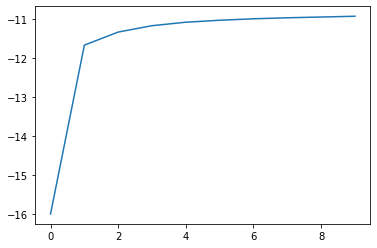

In [37]:
df_likelihoods['mean_log_Likelihood'].plot()

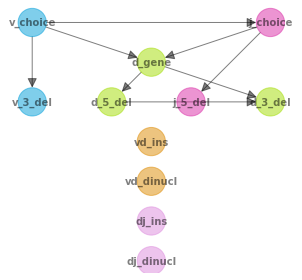

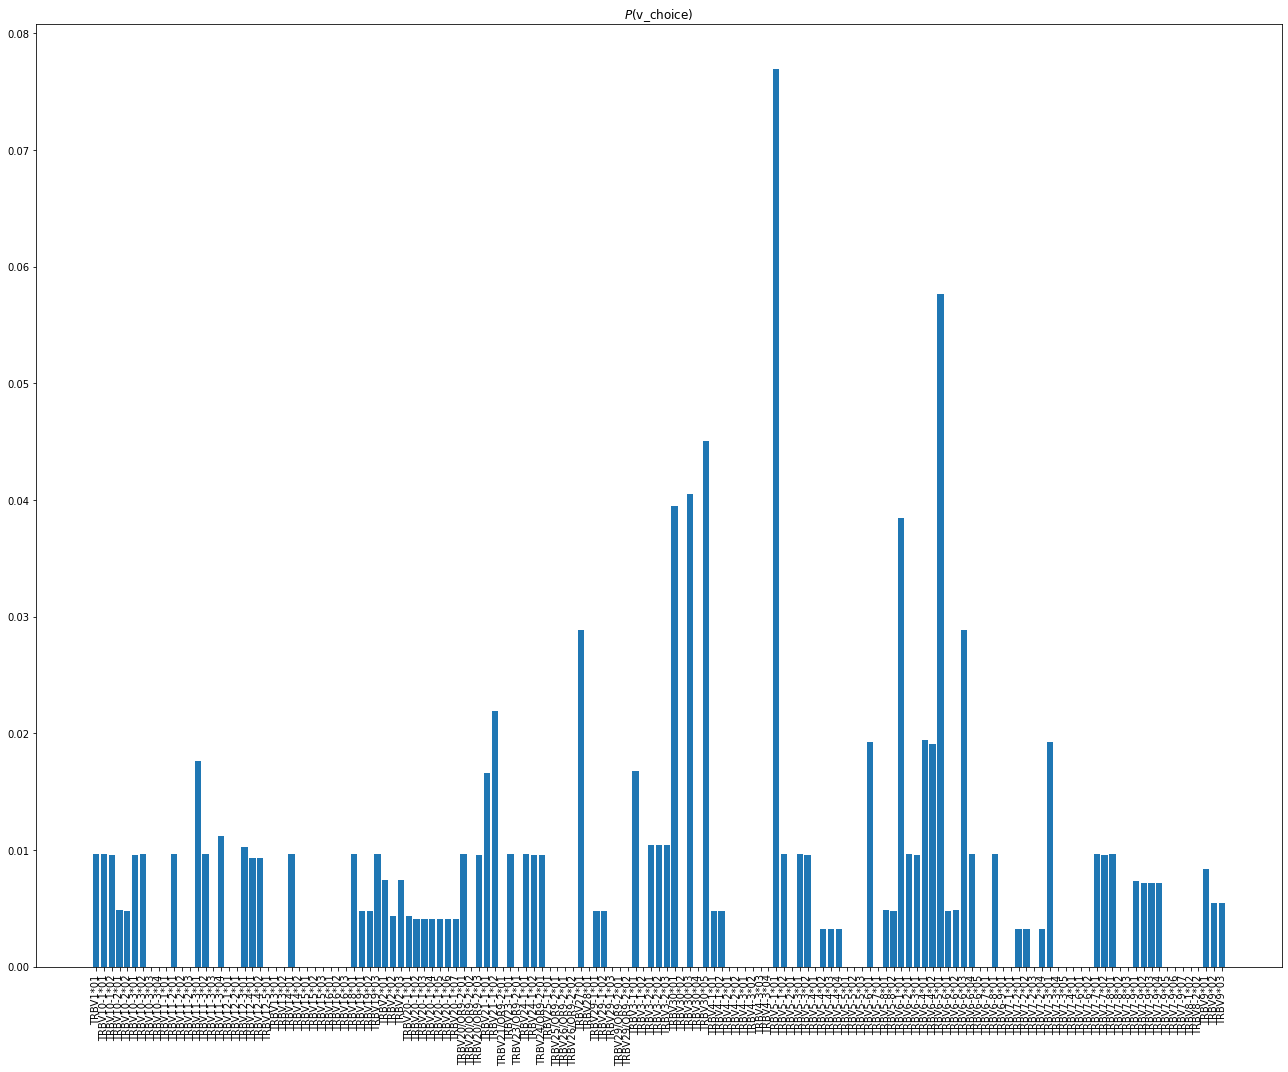

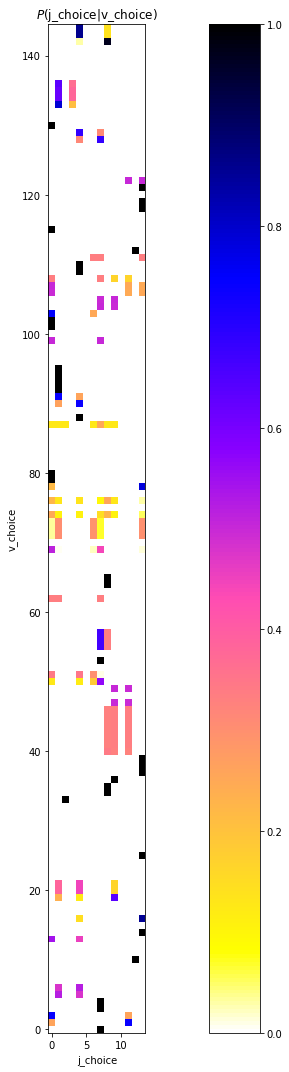

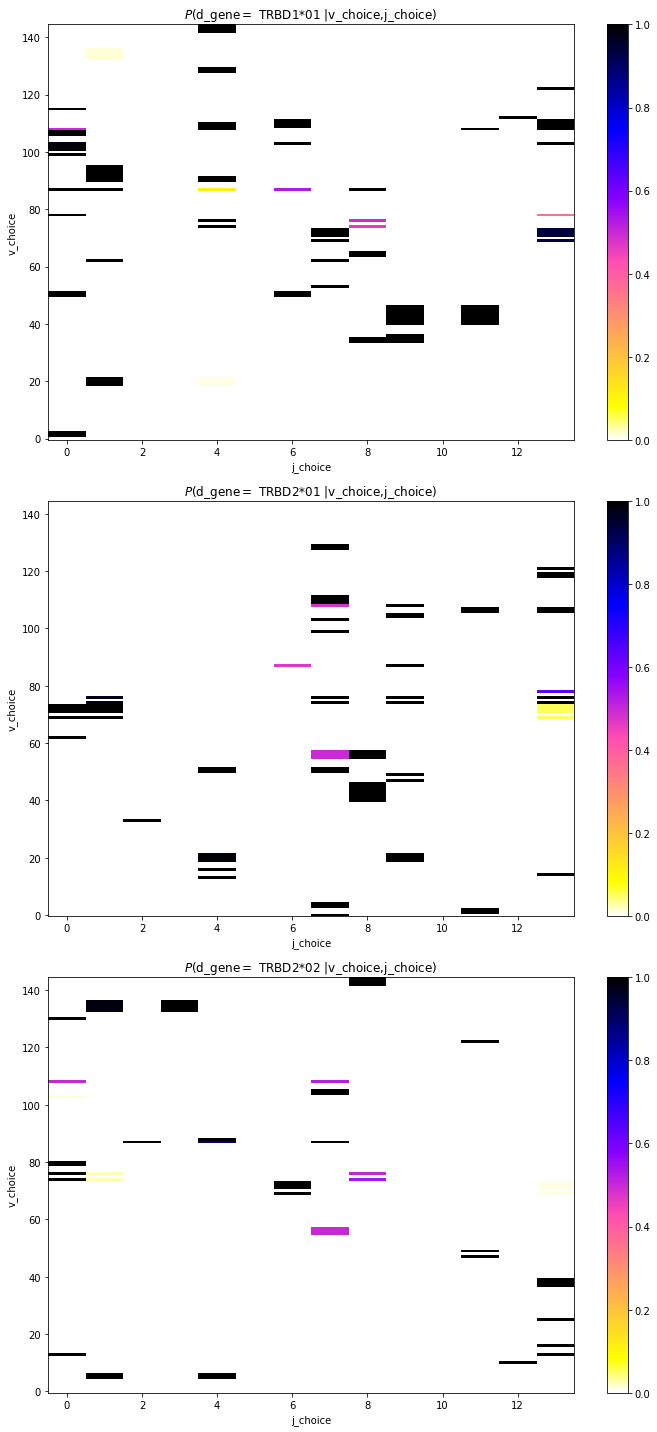

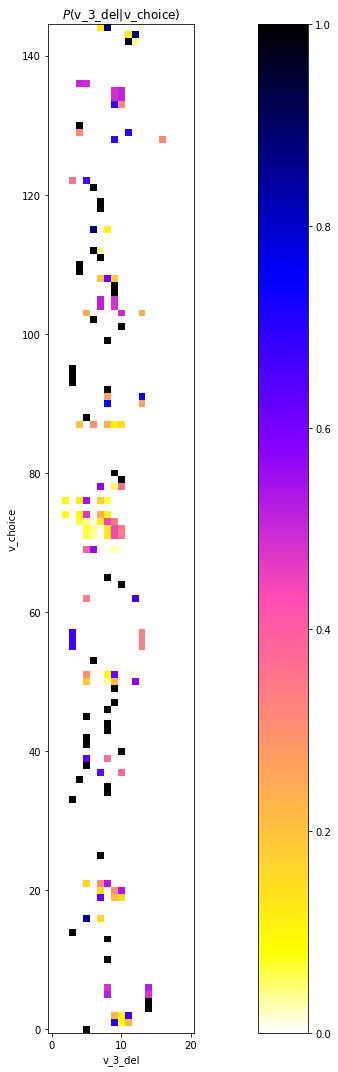

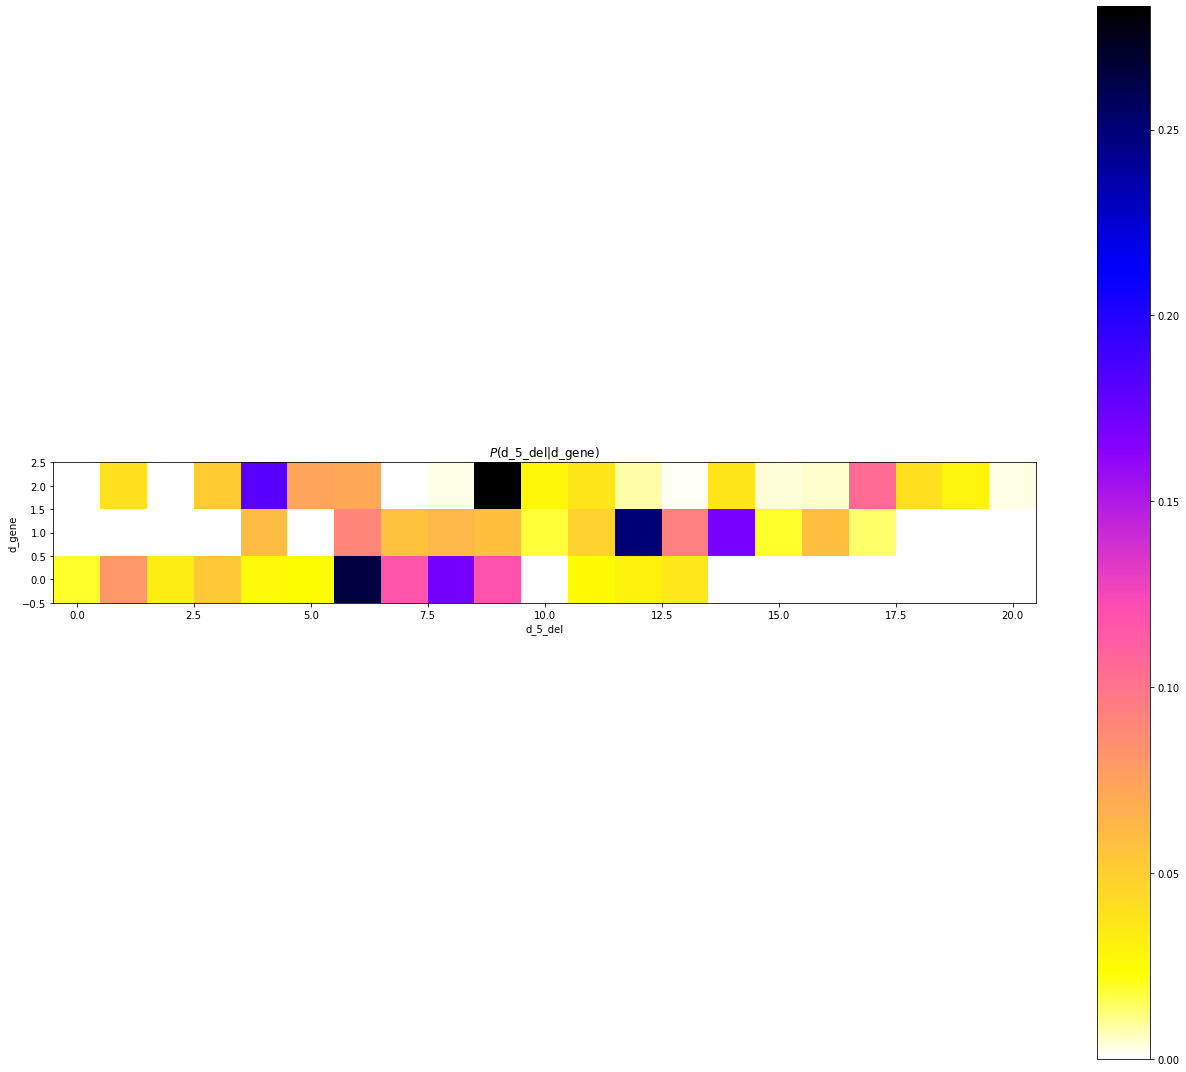

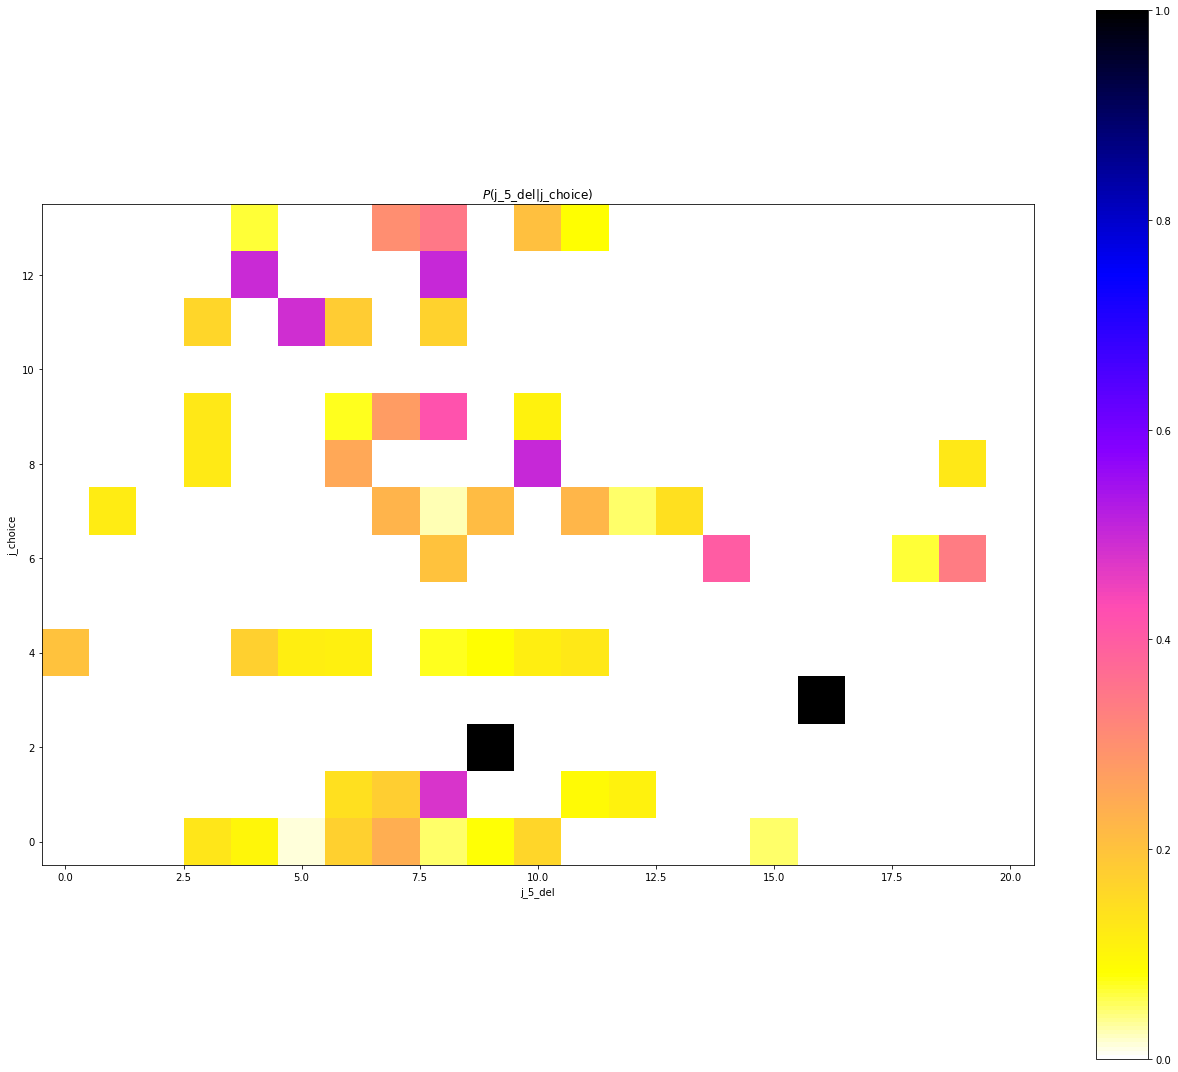

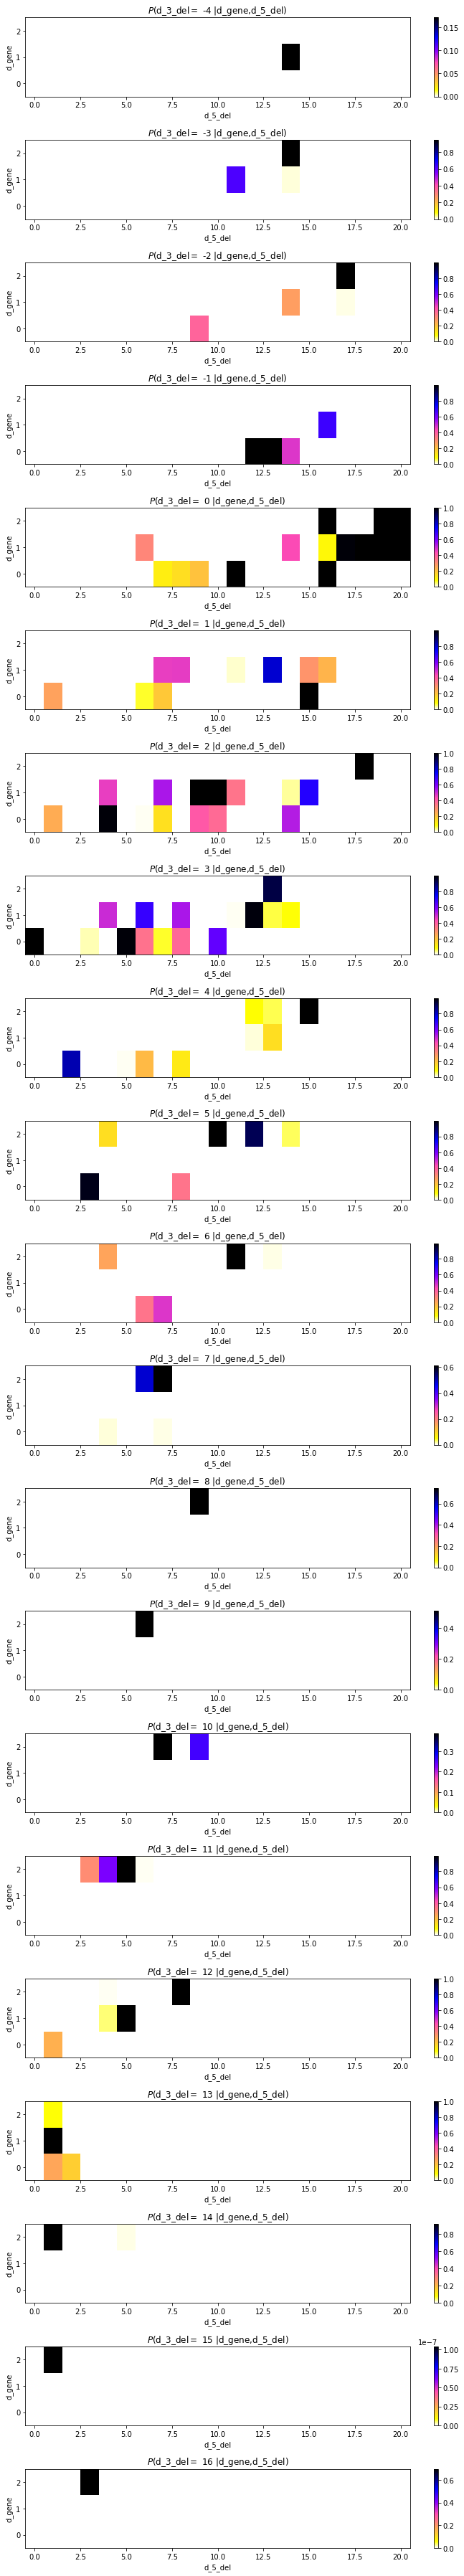

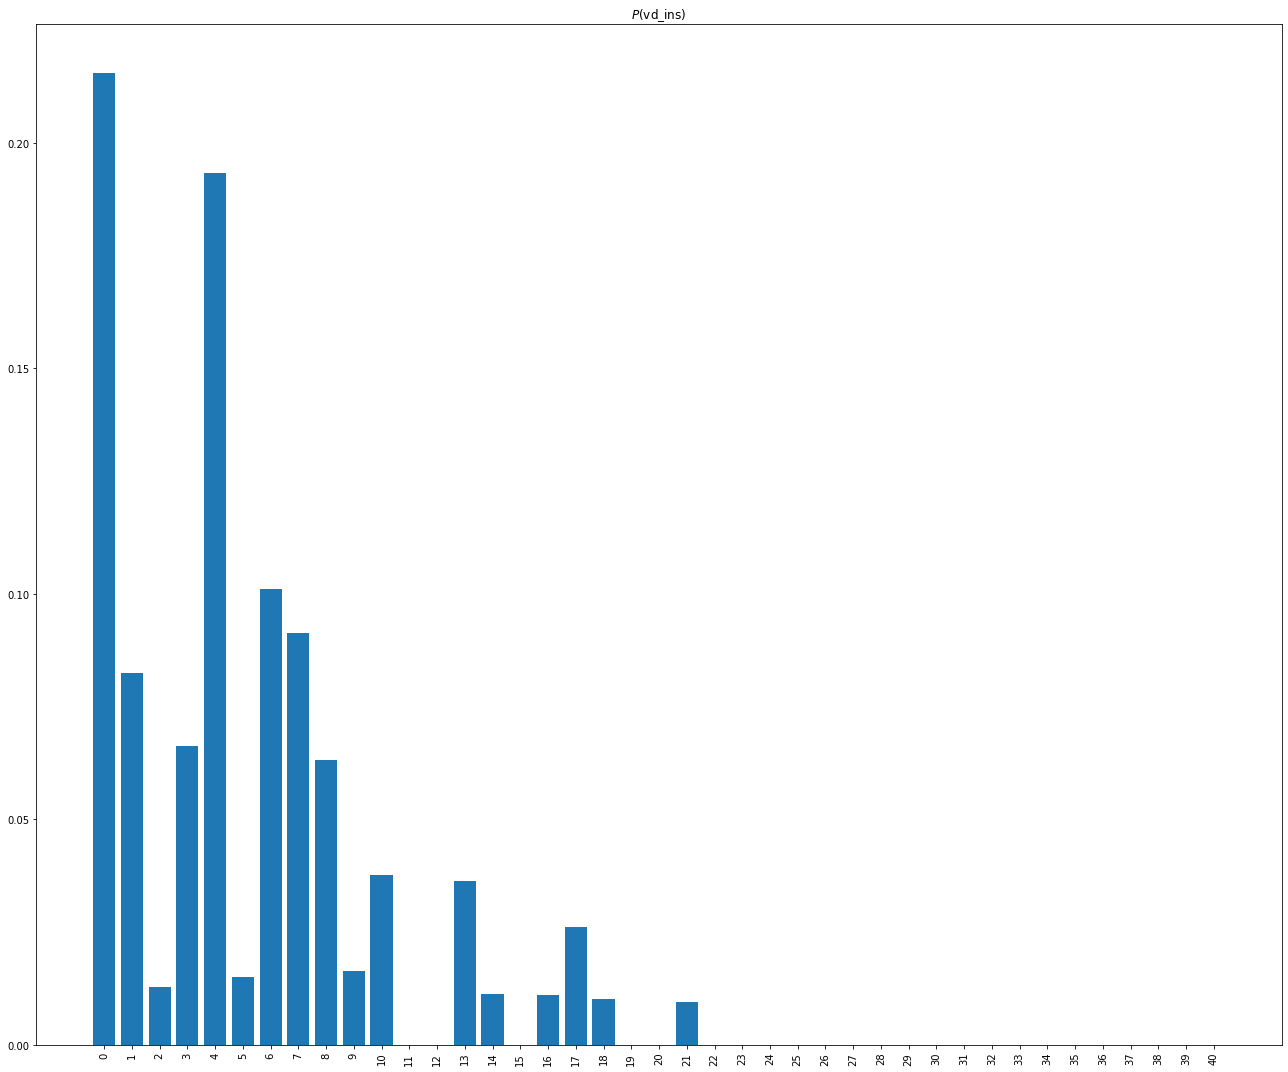

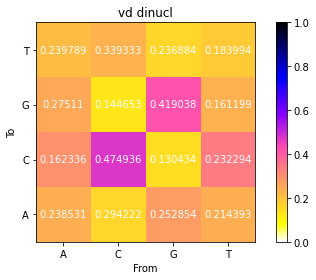

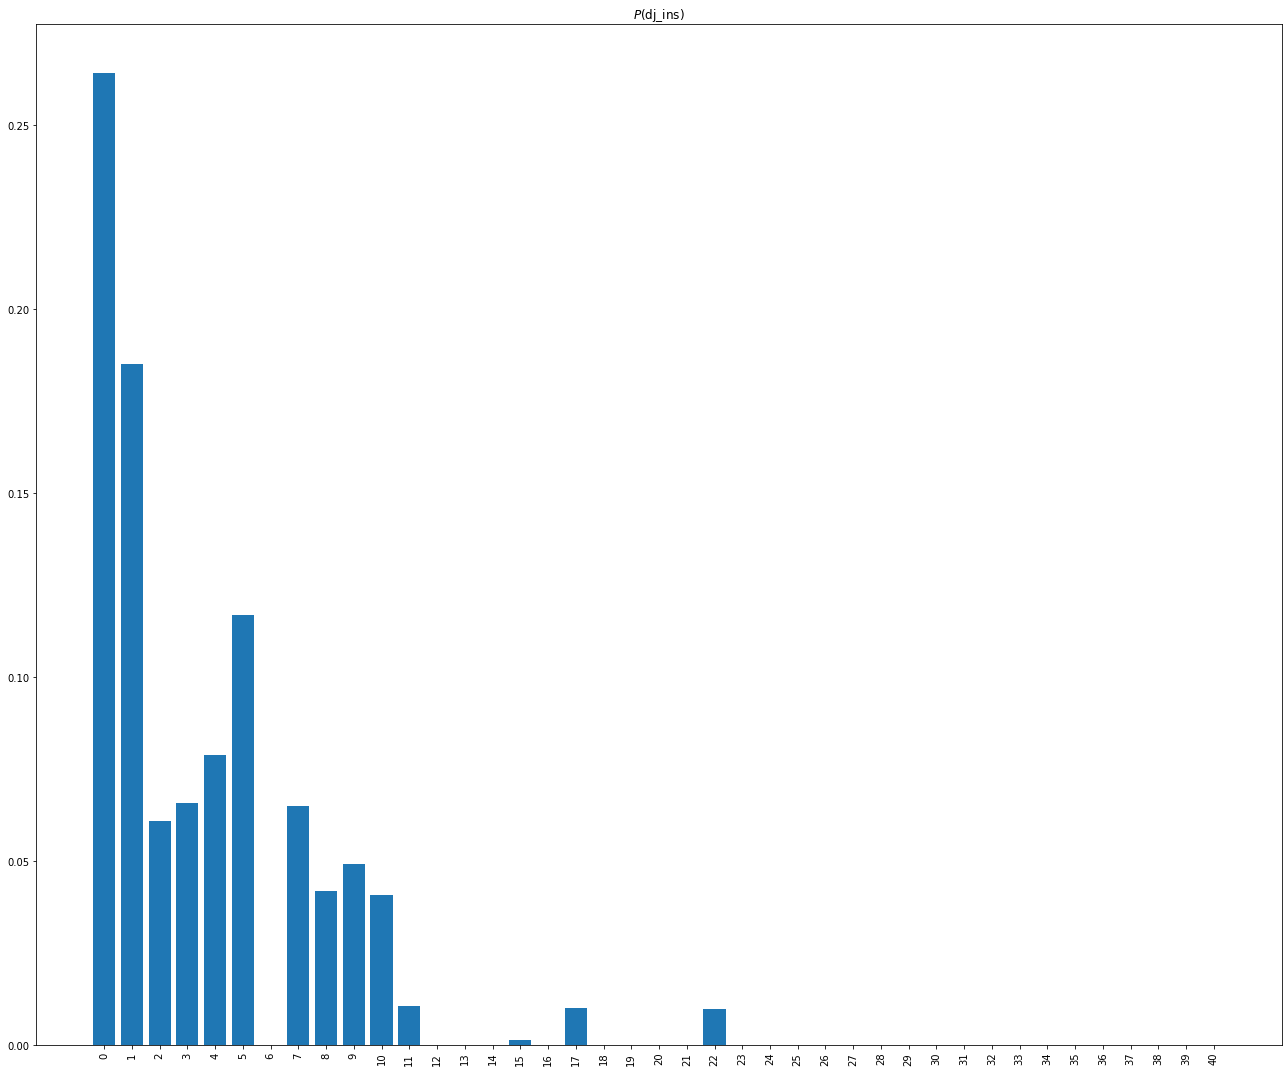

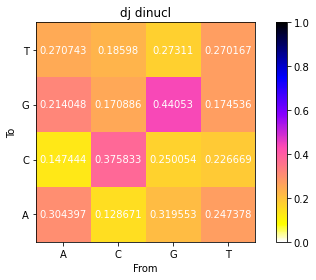

In [38]:
hb_mdl_new.export_plot_Pconditionals('CP_hb_new')